# 📘 **How to Use This Template**

*Template Version: 1.0 | Last Updated: February 2026*

## **Quick Start Guide**

This notebook provides a comprehensive, structured framework for data analysis and predictive modeling following the **PACE methodology** (Plan → Analyze → Construct → Execute).

### **Before You Begin:**
1. **Save a copy** of this template for your specific project
2. **Update the Project Overview** section with your project details
3. **Collapse or delete sections** that don't apply (e.g., class imbalance for regression)
4. **Add code cells** below each markdown section as you progress

### **Workflow by Project Type:**

**For Classification Projects** (e.g., churn prediction, fraud detection):
- Use all sections including class imbalance handling
- Focus on: Logistic Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: AUC-ROC, Precision, Recall, F1-score

**For Regression Projects** (e.g., price prediction, forecasting):
- Skip class imbalance sections
- Focus on: Linear Regression, Decision Tree, Random Forest, XGBoost models
- Key metrics: RMSE, MAE, R², Adjusted R²

**For Exploratory/Descriptive Analysis:**
- Focus on Plan and Analyze phases
- Use statistical testing sections
- May skip Construct phase entirely

### **Template Navigation Tips:**
- 📋 Each section has clear objectives and guiding questions
- 💭 Reflection prompts help document decisions and insights
- 📊 Reference tables provide quick guidance on methods and assumptions
- ✅ Use transition checklists to ensure completeness before moving to next phase

### **Key Features:**
- **Modular Design:** Use only what you need
- **Iterative Process:** Revisit earlier sections as needed
- **Documentation Built-in:** Insight sections prompt you to record findings
- **Best Practices:** Includes guidance on assumptions, ethics, and validation

### **Typical Time Investment:**
- **Quick analysis:** 2-4 hours (Plan + Analyze only)
- **Full modeling project:** 8-16 hours (all phases)
- **Production-ready:** Add 4-8 hours for documentation and deployment prep

---

## **Project Overview** 📋

**Project Title:**  
*Telecom Churn Prediction*

**Business Problem:**  
*A Telecommunications provider is losing customers to competitors but lacks visibility into which customers are at risk of leaving.*

**Objective:**  
*Build a predictive model to identify customers likely to churn (1 = Customer Leaves, 0 = Customer Stays), enabling targeted retention interventions. The challenge: Most customers are satisfied, so a naive model predicting "Stays" for everyone achieves high accuracy but provides zero business value.*

**Stakeholders:**  
*[Who requested this analysis? Who will use the results? e.g., Marketing team, Customer Success, Executive leadership]*

**Data Source:**  
*Synthetic dataset generated internally.*

**Key Questions:**  
* *Are there any missing values, significant outliers or class imbalance that needs to be addressed?*
* *Which features are most predictive of customer churn?*
* *What is the expected accuracy of the churn prediction model?*

**Success Metrics:**  
*Recall (How many churners did we catch?) and F1-Score.*

**Success Criteria:**  
*Target: Achieve an F1-Score (for Class 1) > 0.70.*

**Scope & Constraints:**  
*Synthetic data may not capture all real-world complexities. Model interpretability is a priority for stakeholder buy-in.*

**Project Type:** *Classification*

---

## **PACE Methodology** 🔄

This template follows the **PACE** framework for systematic data analysis and modeling:

| Stage         | Focus              | Key Activities                                                                 |
|---------------|--------------------|-------------------------------------------------------------------------------|
| **📝 Plan**   | Define & Prepare   | Business understanding, data exploration, problem formulation                  |
| **🔍 Analyze**| Explore & Clean    | EDA, data cleaning, feature engineering, statistical analysis                  |
| **🔧 Construct** | Model & Build   | Feature selection, model development, validation                               |
| **🚀 Execute**| Deploy & Communicate| Model evaluation, insights, recommendations, stakeholder communication         |

**PACE Flow:**  
*Plan → Analyze → Construct → Execute*

*Each stage builds on the previous, ensuring a structured, repeatable approach to data science projects.*

---
### **Transition to Plan**
Now that you have defined your project overview, move into the planning stage to clarify business context, technical approach, and resources.

<img src="images/Plan.png" width="75" height="75" align=left>

### **Pace: Plan**

#### **Understand the business scenario and problem**

#### **Questions to reflect on during the Plan stage** 💭

**Business Context**
- Who are the stakeholders and what decisions will this analysis inform?
- What are the success criteria and how will you measure them?
- What constraints exist (budget, timeline, technical resources)?

**Technical Approach**
- What type of analysis is needed (descriptive, predictive, prescriptive)?
- What tools, techniques, and models are you considering?

**Data Assessment**
- What data is available and what are its known limitations?
- Are there gaps that may require additional data collection?

**Initial Hypotheses**
- What relationships or patterns do you expect to find?
- What assumptions are you making that should be validated?

**Ethics & Risk**
- What are potential ethical considerations or sources of bias?
- What could go wrong, and how will you mitigate risks?

#### **Data Dictionary**

| Feature                        | Description                       | Data Type        | Example Values         | Notes                        |
|-------------------|--------------------------------------------------|--------------|----------------------------|------------------------------------------|
| customer_id       | Unique identifier for each customer              | Integer      | 1001, 1002, 1003, ..., 4000| Primary key                              |
| age               | Age of the customer in years                     | Integer      | 18-79                      | Customer demographics                    |
| tenure_months     | Number of months the customer has been with the company | Integer | 1-71                    | Loyalty indicator                        |
| monthly_bill      | Monthly billing amount in USD                    | Float        | ~20-160                    | Based on normal distribution (μ=70, σ=30)|
| total_data_usage_gb | Total data usage in gigabytes per month       | Float        | ~0-90                      | Based on normal distribution (μ=50, σ=20); ~5% missing values |
| customer_support_calls | Number of customer support calls made      | Integer      | 0-8+                       | Poisson distribution (λ=1.5); High calls may indicate dissatisfaction |
| contract_type     | Type of customer contract                        | Categorical  | Month-to-Month, Monthly, One Year, 1-year, Two Year, 2-year | Inconsistent formatting (intentional)    |
| churn             | Whether the customer churned (left the company)  | Binary       | 0 (Stayed), 1 (Churned)    | Target variable; Imbalanced dataset      |

**Data Quality Notes**
- **Missing Values:** Upon completing preliminary analysis of the dataset, it was identified there are missing values in the following columns: total_data_usage_gb.
- **Outliers:** There are a few extreme values in the monthly_bill column (e.g., > $200) that may need to be investigated further.
- **Class Imbalance:** The target variable 'churn' is imbalanced, with a significantly lower proportion of churned customers (Class 1) compared to non-churned customers (Class 0).
- **Data Collection Period:** This data was generated synthetically.
- **Known Issues:** None beyond the intentional imperfections for testing purposes.

### **Task 1. Imports & Data Loading**

#### **Task 1a. Import Libraries**
- Import packages
- Load dataset

In [4]:
# =============================================================================
# IMPORTS
# =============================================================================

# --- Standard Library ---
from datetime import datetime

# --- Data Manipulation & Numerical Computing ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

# --- Statistical Analysis ---
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Machine Learning: Preprocessing ---
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer

# --- Machine Learning: Feature Selection ---
from sklearn.feature_selection import RFECV

# --- Machine Learning: Models ---
from sklearn.ensemble import RandomForestClassifier

# --- Machine Learning: Evaluation ---
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score
)

# --- Model Interpretation ---
import shap

# --- Model Persistence ---
import joblib

#### **Task 1b. Load Data**

In [5]:
np.random.seed(99) # New seed

n_samples = 3000

# 1. Base Features
data = {
    'customer_id': range(1001, 1001 + n_samples),
    'age': np.random.randint(18, 80, n_samples),
    'tenure_months': np.random.randint(1, 72, n_samples),
    'monthly_bill': np.random.normal(70, 30, n_samples),
    'total_data_usage_gb': np.random.normal(50, 20, n_samples),
    'customer_support_calls': np.random.poisson(1.5, n_samples), # Poisson dist for counts
}

df = pd.DataFrame(data)

# Fix negative values from normal distributions
df['monthly_bill'] = df['monthly_bill'].apply(lambda x: max(x, 20))
df['total_data_usage_gb'] = df['total_data_usage_gb'].apply(lambda x: max(x, 0))

# 2. Messy Categorical Feature (The "Dirty" Data)
# Intentionally inconsistent casing and terminology
contract_options = ['Month-to-Month', 'month-to-month', 'Monthly', 'One Year', '1-year', 'Two Year', '2-year']
df['contract_type'] = np.random.choice(contract_options, n_samples)

# 3. Generating the Target: 'Churn' (0 or 1)
# Calculate a 'churn_probability' score based on logic
def get_churn_prob(row):
    score = 0.15 # Base churn risk (15%)
    
    # Contract risk (Month-to-month is risky)
    if str(row['contract_type']).lower() in ['month-to-month', 'monthly']:
        score += 0.30
        
    # Support Calls risk (High calls = Angry customer)
    if row['customer_support_calls'] > 3:
        score += 0.40
    
    # Tenure loyalty (Longer tenure = Lower risk)
    score -= (row['tenure_months'] * 0.005)
    
    # Bill shock (High bill + Low usage = Risk)
    if row['monthly_bill'] > 100 and row['total_data_usage_gb'] < 10:
        score += 0.25
        
    # Add noise
    score += np.random.normal(0, 0.1)
    
    return min(max(score, 0), 1) # Clamp between 0 and 1

df['churn_prob'] = df.apply(get_churn_prob, axis=1)

# Convert probability to binary target (1 = Churn, 0 = Stay)
# Note: This creates an IMBALANCED dataset
df['churn'] = df['churn_prob'].apply(lambda x: 1 if x > 0.5 else 0)

# Drop the probability column so you can't cheat!
df.drop(columns=['churn_prob'], inplace=True)

# --- INTRODUCTION OF MISSING VALUES --- #
# Insert NaNs in 'total_data_usage_gb'
nan_indices = np.random.choice(df.index, size=150, replace=False)
df.loc[nan_indices, 'total_data_usage_gb'] = np.nan

print("Churn Dataset Generated!")
print(f"Churn Rate: {df['churn'].mean():.2%}")
print(df.head())

Churn Dataset Generated!
Churn Rate: 6.40%
   customer_id  age  tenure_months  monthly_bill  total_data_usage_gb  \
0         1001   19             42     45.422406            28.050591   
1         1002   53             41     78.016864            55.702603   
2         1003   75              4     67.011073            74.798731   
3         1004   58             51     43.303750            39.913597   
4         1005   27             43    104.898819            78.216551   

   customer_support_calls   contract_type  churn  
0                       1          2-year      0  
1                       2          2-year      0  
2                       1          1-year      0  
3                       1         Monthly      0  
4                       1  month-to-month      0  


---
### ***End of Plan Section Insights***

**Business Context**
- What are the key business and technical objectives?
- What are the success criteria and constraints?

**Technical Approach**
- What analysis type and methods will be used?
- What tools and techniques were selected and why?

**Data Assessment**
- Is the available data sufficient and appropriate for analysis?
- What data quality issues need to be addressed before analysis?

**Initial Hypotheses**
- What hypotheses will guide your exploratory analysis?
- What assumptions need validation during the Analyze phase?

**Risks & Ethics**
- What are the main risks or limitations identified?
- What ethical considerations were noted?

---
### **Transition to Analyze**

With planning complete, begin exploring and cleaning your data to prepare for statistical analysis or modeling.

**✅ Before proceeding, ensure you have:**
- ✓ Clearly defined business objectives and success criteria
- ✓ Documented data sources and data dictionary
- ✓ Identified stakeholders and their requirements
- ✓ Assessed ethical considerations and potential biases
- ✓ Established project timeline and resources

**📋 Deliverables from Plan stage:**
- Project overview with objectives and metrics
- Data dictionary with variable descriptions
- Initial hypotheses and analysis questions
- Risk assessment and mitigation strategies

<img src="images/Analyze.png" width="75" height="75" align=left>

### **pAce: Analyze**

#### **Questions to reflect on during the Analyze stage** 💭

**Data Understanding**
- What story do the distributions tell about your data?
- Are there relationships between features that warrant deeper investigation?
- Does anything look "off" or unexpected?

**Data Quality & Preparation**
- What cleaning decisions require judgment calls (e.g., imputation strategy, outlier handling)?
- What domain-relevant features could be engineered?
- How severe is the class imbalance, and what's your strategy?

**Statistical Validation**
- Which statistical tests will validate your EDA observations?
- Are the assumptions for your planned models being met?

**Readiness for Modeling**
- What red flags might cause problems during modeling?
- Is there anything you'd want to revisit after initial model results?

**Ethics**
- Could any features or patterns introduce bias in predictions?

### **Task 2. Data Exploration (*Initial EDA and Data Cleaning*)**
- Understand the variables
- Clean the dataset (missing data, redundant data, outliers)
- Perform EDA (analyze relationships between variables)

#### **Task 2a. Gather Basic Information about the Data**

In [6]:
# Gather some basic information about the dataset
print("\nDataset Info:")
print(df.info())
print("\nDataset Description:")
print(df.describe(include='all'))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3000 non-null   int64  
 1   age                     3000 non-null   int32  
 2   tenure_months           3000 non-null   int32  
 3   monthly_bill            3000 non-null   float64
 4   total_data_usage_gb     2850 non-null   float64
 5   customer_support_calls  3000 non-null   int32  
 6   contract_type           3000 non-null   object 
 7   churn                   3000 non-null   int64  
dtypes: float64(2), int32(3), int64(2), object(1)
memory usage: 152.5+ KB
None

Dataset Description:
        customer_id          age  tenure_months  monthly_bill  \
count   3000.000000  3000.000000    3000.000000   3000.000000   
unique          NaN          NaN            NaN           NaN   
top             NaN          NaN            NaN      

#### **Task 2b. Descriptive Statistics about the Data**

In [7]:
# Descriptive Statistics
print("\nMissing Values in Each Column:")
print(df.isnull().sum())
print("\nOutlier Summary for Monthly Bill:")
print(df['monthly_bill'].describe())
print("\nClass Distribution for Churn:")
print(df['churn'].value_counts(normalize=True))


Missing Values in Each Column:
customer_id                 0
age                         0
tenure_months               0
monthly_bill                0
total_data_usage_gb       150
customer_support_calls      0
contract_type               0
churn                       0
dtype: int64

Outlier Summary for Monthly Bill:
count    3000.000000
mean       70.835804
std        29.125257
min        20.000000
25%        49.659660
50%        70.317365
75%        90.826931
max       188.283840
Name: monthly_bill, dtype: float64

Class Distribution for Churn:
churn
0    0.936
1    0.064
Name: proportion, dtype: float64


#### **Task 2c. Rename Columns**

#### **Task 2d. Drop Columns**

#### **Task 2e. Handle Duplicate Values**

In [8]:
# Check for and handle any duplicate values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


#### **Task 2f. Handle Missing Values & Incomplete Data**

In [9]:
# Handle any missing values (e.g., impute with median)
# df['total_data_usage_gb'].fillna(df['total_data_usage_gb'].median(), inplace=True)
# print("\nMissing values after imputation:")
# print(df.isnull().sum())

# KNN imputation to consider relationships between features
knn_imputer = KNNImputer(n_neighbors=5)
df[['total_data_usage_gb']] = knn_imputer.fit_transform(df[['total_data_usage_gb']])


#### **Task 2g. Check Class Imbalances** *(For Classification Problems)*

**Note:** Checking class balance early helps inform your EDA strategy and modeling approach. For regression problems, skip this section.

| Model                | Importance of Handling Class Imbalances | Why?                                                                                                                                                                                                  |
|----------------------|-----------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Moderate                                | Decision Trees can handle some imbalance due to splitting on feature importance, but severe imbalance may bias splits toward the majority class. Consider class weighting or resampling if imbalance is high. |
| Random Forests (RF)  | Moderate                                | Random Forests are more robust than single trees but can still favor the majority class with significant imbalance. Use class weighting, balanced subsampling, or SMOTE for better minority class prediction. |
| Linear Regression    | Low                                     | Linear Regression is not used for classification, so class imbalance is not directly relevant. For regression with imbalanced targets, focus on distributional skew rather than class imbalance.            |
| Logistic Regression  | High                                    | Logistic Regression is sensitive to class imbalance, which can bias decision boundaries and reduce minority class recall. Use class weighting, oversampling, or undersampling to address imbalance.         |
| XGBoost             | Moderate to High                        | XGBoost is robust to some imbalance due to boosting, but severe imbalance can still bias results. Adjust `scale_pos_weight`, use custom metrics (AUC-ROC), or resample data for best results.               |

In [10]:
# Check class imbalance
print("\nClass Distribution for Churn:")
print(df['churn'].value_counts(normalize=True))


Class Distribution for Churn:
churn
0    0.936
1    0.064
Name: proportion, dtype: float64


- There is significant imbalance in the churn variable. This will need to be addressed prior to building models like Logistic Regression or tree-based models like Decision Tree or Random Forest.

### **Task 3. Data Exploration *(Continue EDA)***

#### **Task 3a. Data Visualizations** 📊

This section provides comprehensive visualizations to understand data distributions, relationships, and patterns.

**Note**: Visualizations in this section can instead be created in other tools like Tableau or Power BI.

##### **Univariate Visualizations**

##### Categorical Features

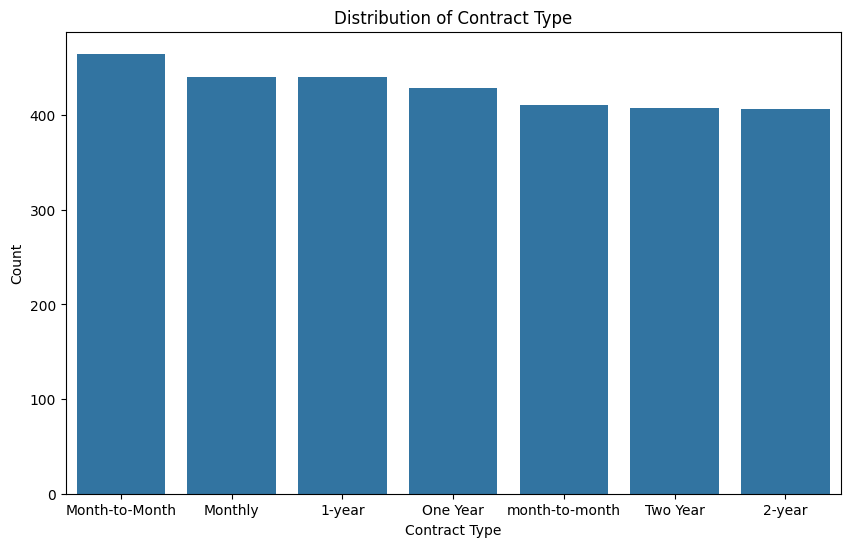

In [11]:
# Plot for categorical variable 'contract_type'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', order=df['contract_type'].value_counts().index)
plt.title('Distribution of Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

- The `contract_type` variable contains inconsistent formatting with three variations representing the same value: "Month-to-Month", "Monthly", and "month-to-month". Additionally, "1-year" and "One Year" represent the same contract type, as do "2-year" and "Two Year". These inconsistencies will need to be standardized during data cleaning.

##### Boolean Variables

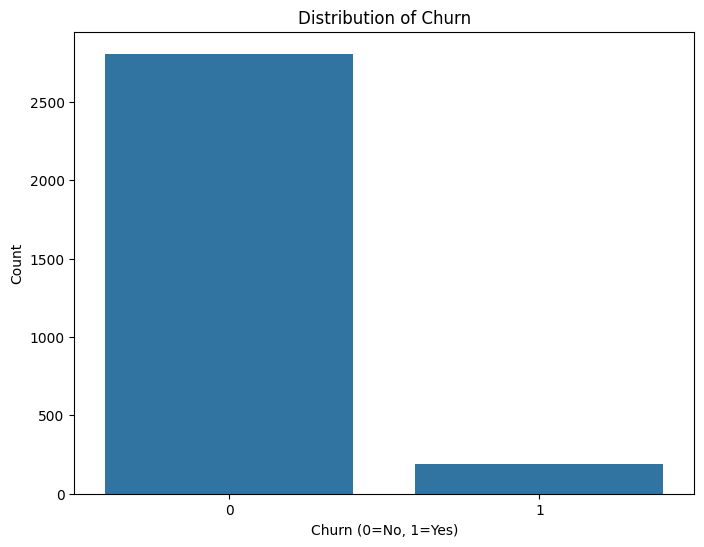

In [12]:
# Plot for binary target 'churn'
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='churn', order=[0, 1])
plt.title('Distribution of Churn')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

- As indicated earlier in the EDA, the target variable 'churn' is imbalanced, with a significantly lower proportion of churned customers (Class 1) compared to non-churned customers (Class 0). This imbalance needs to be addressed during the modeling phase to ensure the model does not simply predict the majority class and instead learns to identify customers who are likely to churn.

##### Discrete Numeric Variables

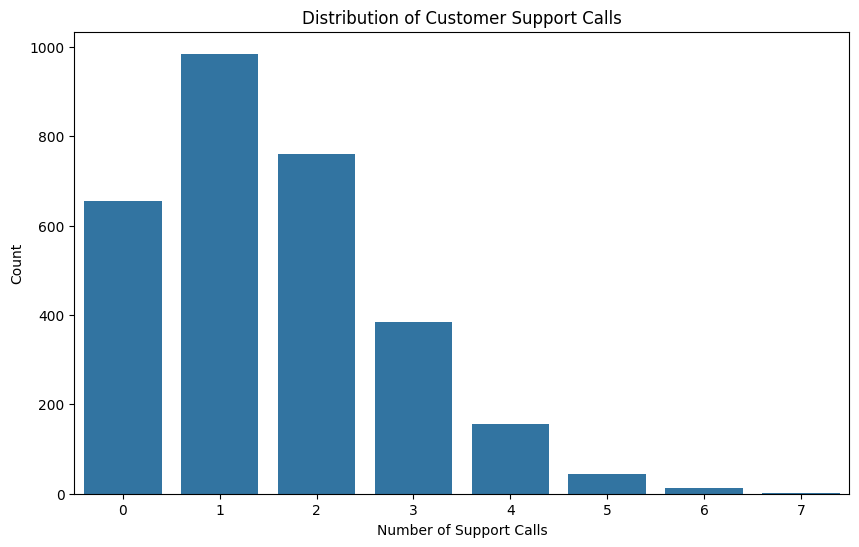

In [13]:
# Plot for discrete numeric variable 'customer_support_calls'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='customer_support_calls', order=sorted(df['customer_support_calls']))
plt.title('Distribution of Customer Support Calls')
plt.xlabel('Number of Support Calls')
plt.ylabel('Count')
plt.show()

- The 'customer_support_calls' variable shows a right-skewed distribution, with most customers making few support calls and a small number making many calls. This suggests that while most customers are satisfied, a subset may be experiencing issues leading to higher call volumes. This variable could be an important predictor of churn, as frequent support calls may indicate dissatisfaction.

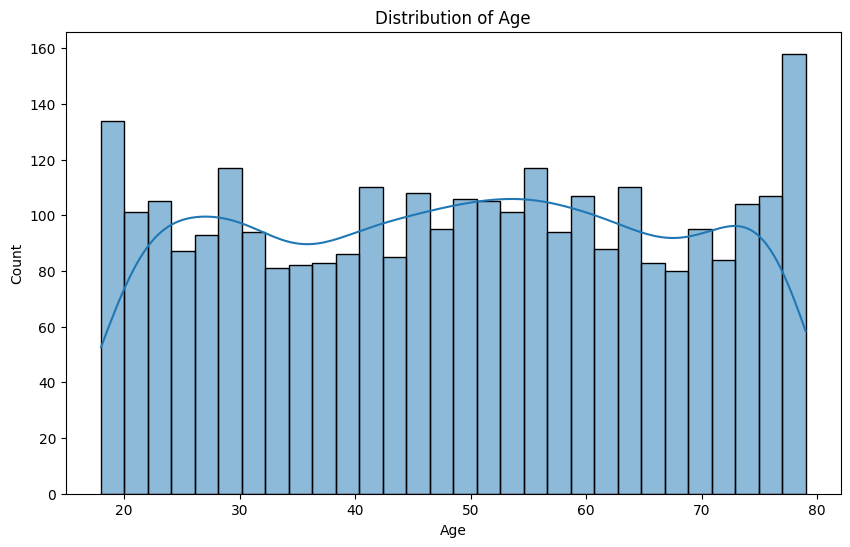

In [14]:
# Plot for discrete numeric variable 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- 'age' appears to be more uniformly distributed across the age range, with no significant skewness. This suggests a diverse customer base in terms of age, which may influence churn behavior differently across age groups.

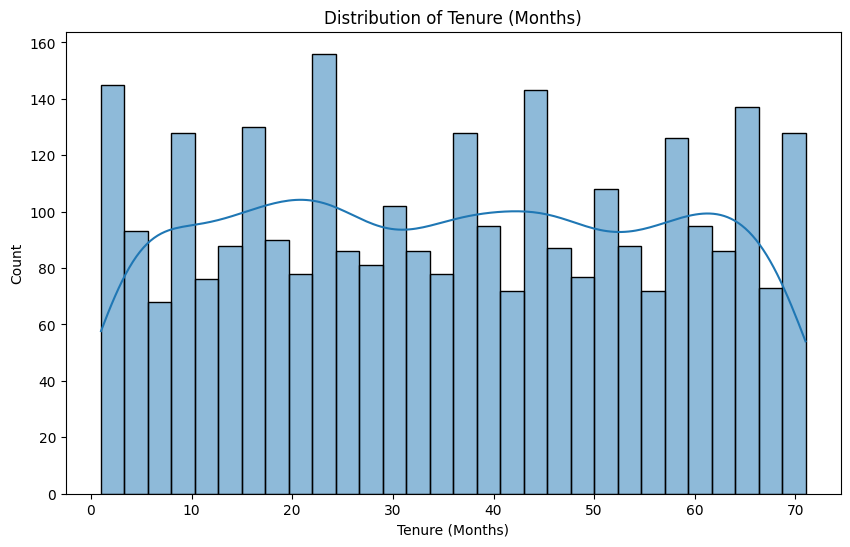

In [15]:
# Plot for discrete numeric variable 'tenure_months'
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure_months'], bins=30, kde=True)
plt.title('Distribution of Tenure (Months)')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

- 'tenure_months' shows a uniform distribution as well, with customers spread across different tenure lengths. This indicates that the customer base includes both new and long-term customers, which may have varying churn rates.

##### Continuous Numeric Variables

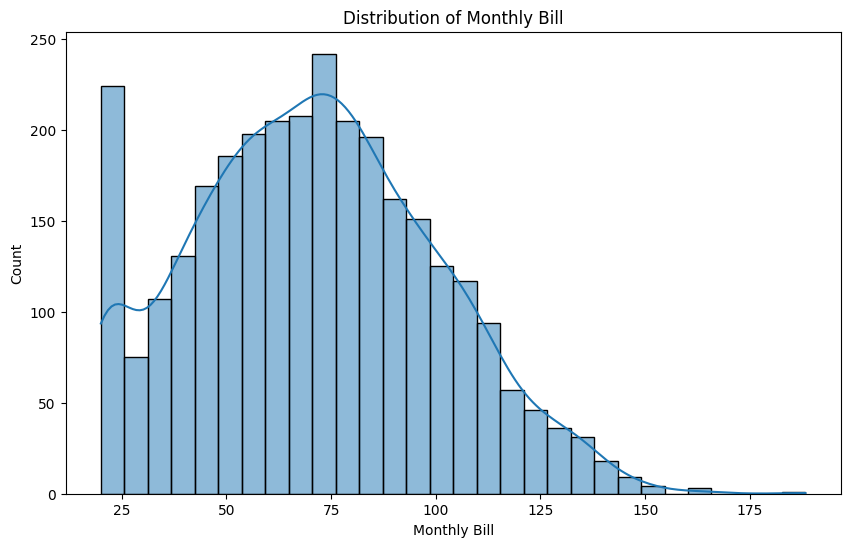

In [16]:
# Plot for continuous numeric variable 'monthly_bill'
plt.figure(figsize=(10, 6))
sns.histplot(df['monthly_bill'], bins=30, kde=True)
plt.title('Distribution of Monthly Bill')
plt.xlabel('Monthly Bill')
plt.ylabel('Count')
plt.show()


- 'monthly_bill' appears to follow a normal distribution, centered around the mean of approximately $70, with a standard deviation of $30. This suggests that most customers have monthly bills within a reasonable range, but there are some outliers with significantly higher bills. These outliers may need to be investigated further to understand their impact on churn.

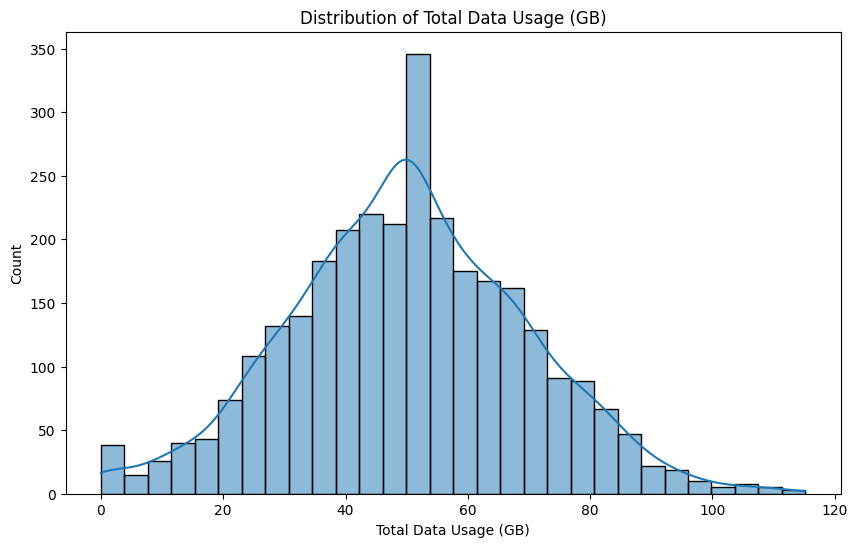

In [17]:
# Plot for continuous numeric variable 'total_data_usage_gb'
plt.figure(figsize=(10, 6))
sns.histplot(df['total_data_usage_gb'], bins=30, kde=True)
plt.title('Distribution of Total Data Usage (GB)')
plt.xlabel('Total Data Usage (GB)')
plt.ylabel('Count')
plt.show()

- 'total_data_usage_gb' also follows a normal distribution, centered around the mean of approximately 50 GB, with a standard deviation of 20 GB. This indicates that most customers have moderate data usage, but there are some with very high or very low usage. Understanding how data usage correlates with churn could provide insights into customer behavior and preferences.

#### **Bivariate Visualizations**

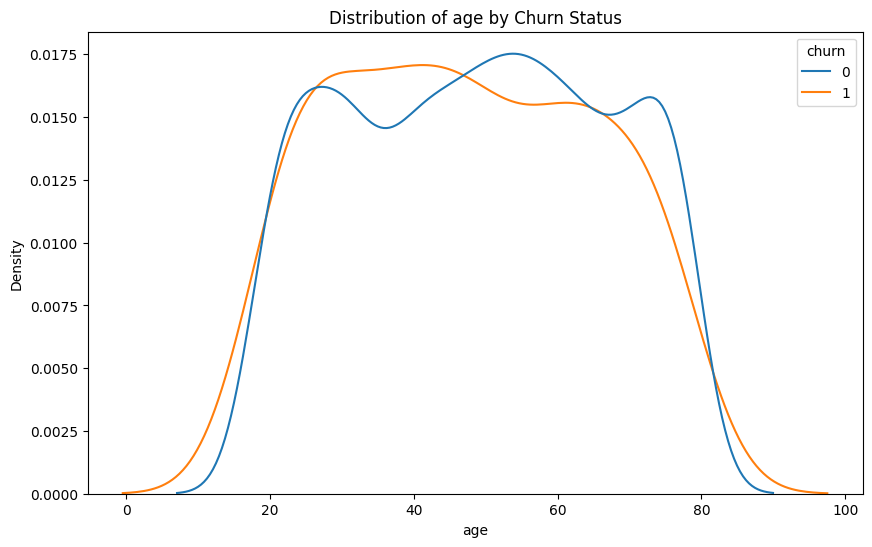

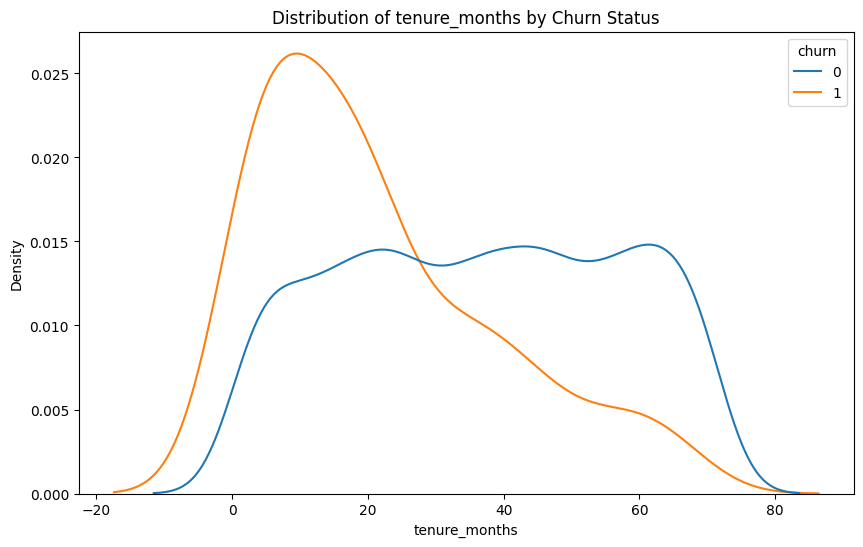

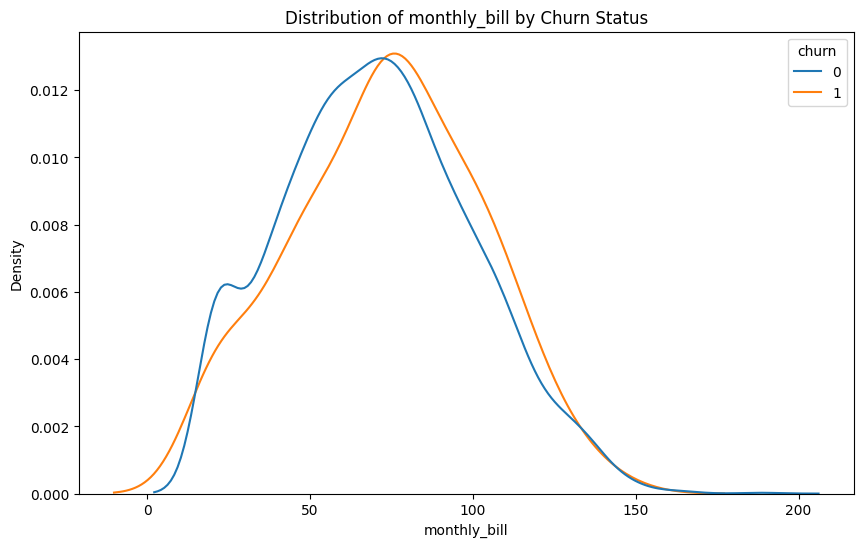

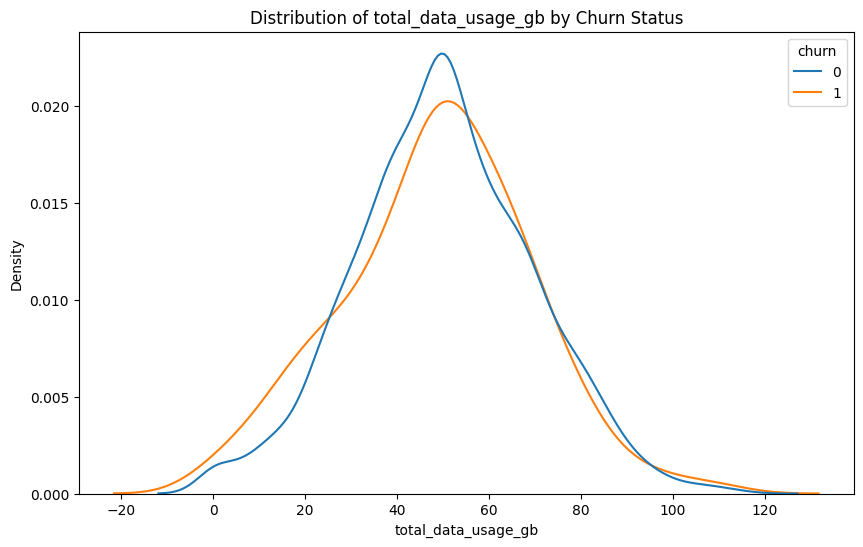

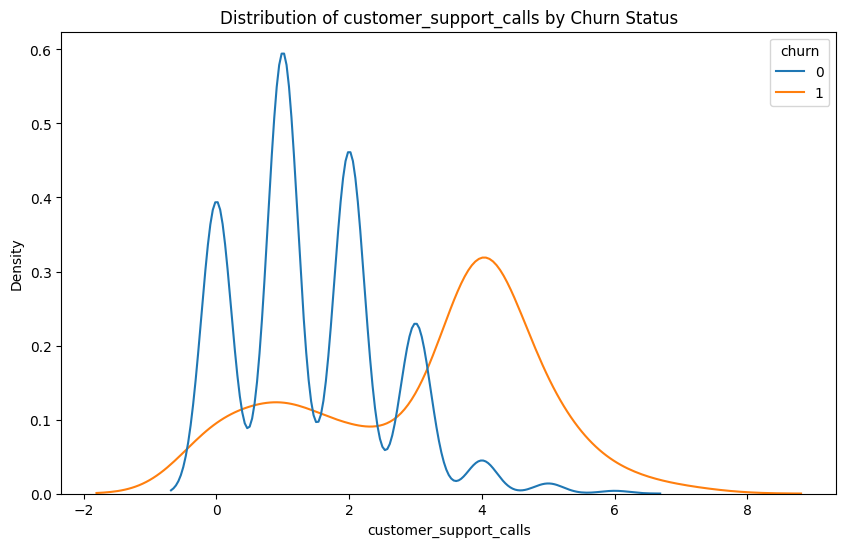

In [18]:
# Compare distributions of numeric features based on churn status
numeric_features = ['age', 'tenure_months', 'monthly_bill', 'total_data_usage_gb', 'customer_support_calls']
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='churn', common_norm=False)
    plt.title(f'Distribution of {feature} by Churn Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

- The kde plots generated show that customers who churn tend to have higher monthly bills and make more customer support calls compared to those who do not churn. This suggests that higher costs and dissatisfaction with service may be key drivers of churn. Additionally, customers with shorter tenure are more likely to churn, indicating that new customers may be at higher risk.

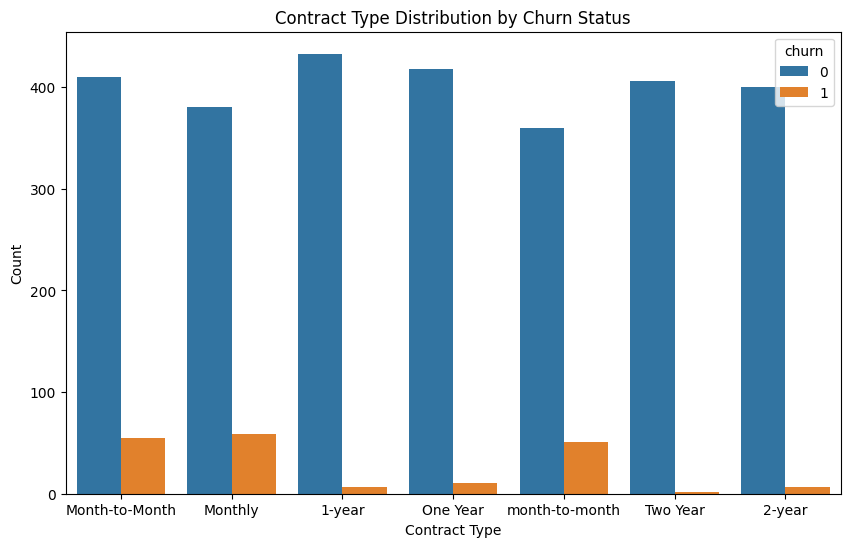

In [19]:
# Compare 'contract_type' across 'churn'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contract_type', hue='churn', order=df['contract_type'].value_counts().index)
plt.title('Contract Type Distribution by Churn Status')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

#### **Multivariate Visualizations**

<Figure size 1200x800 with 0 Axes>

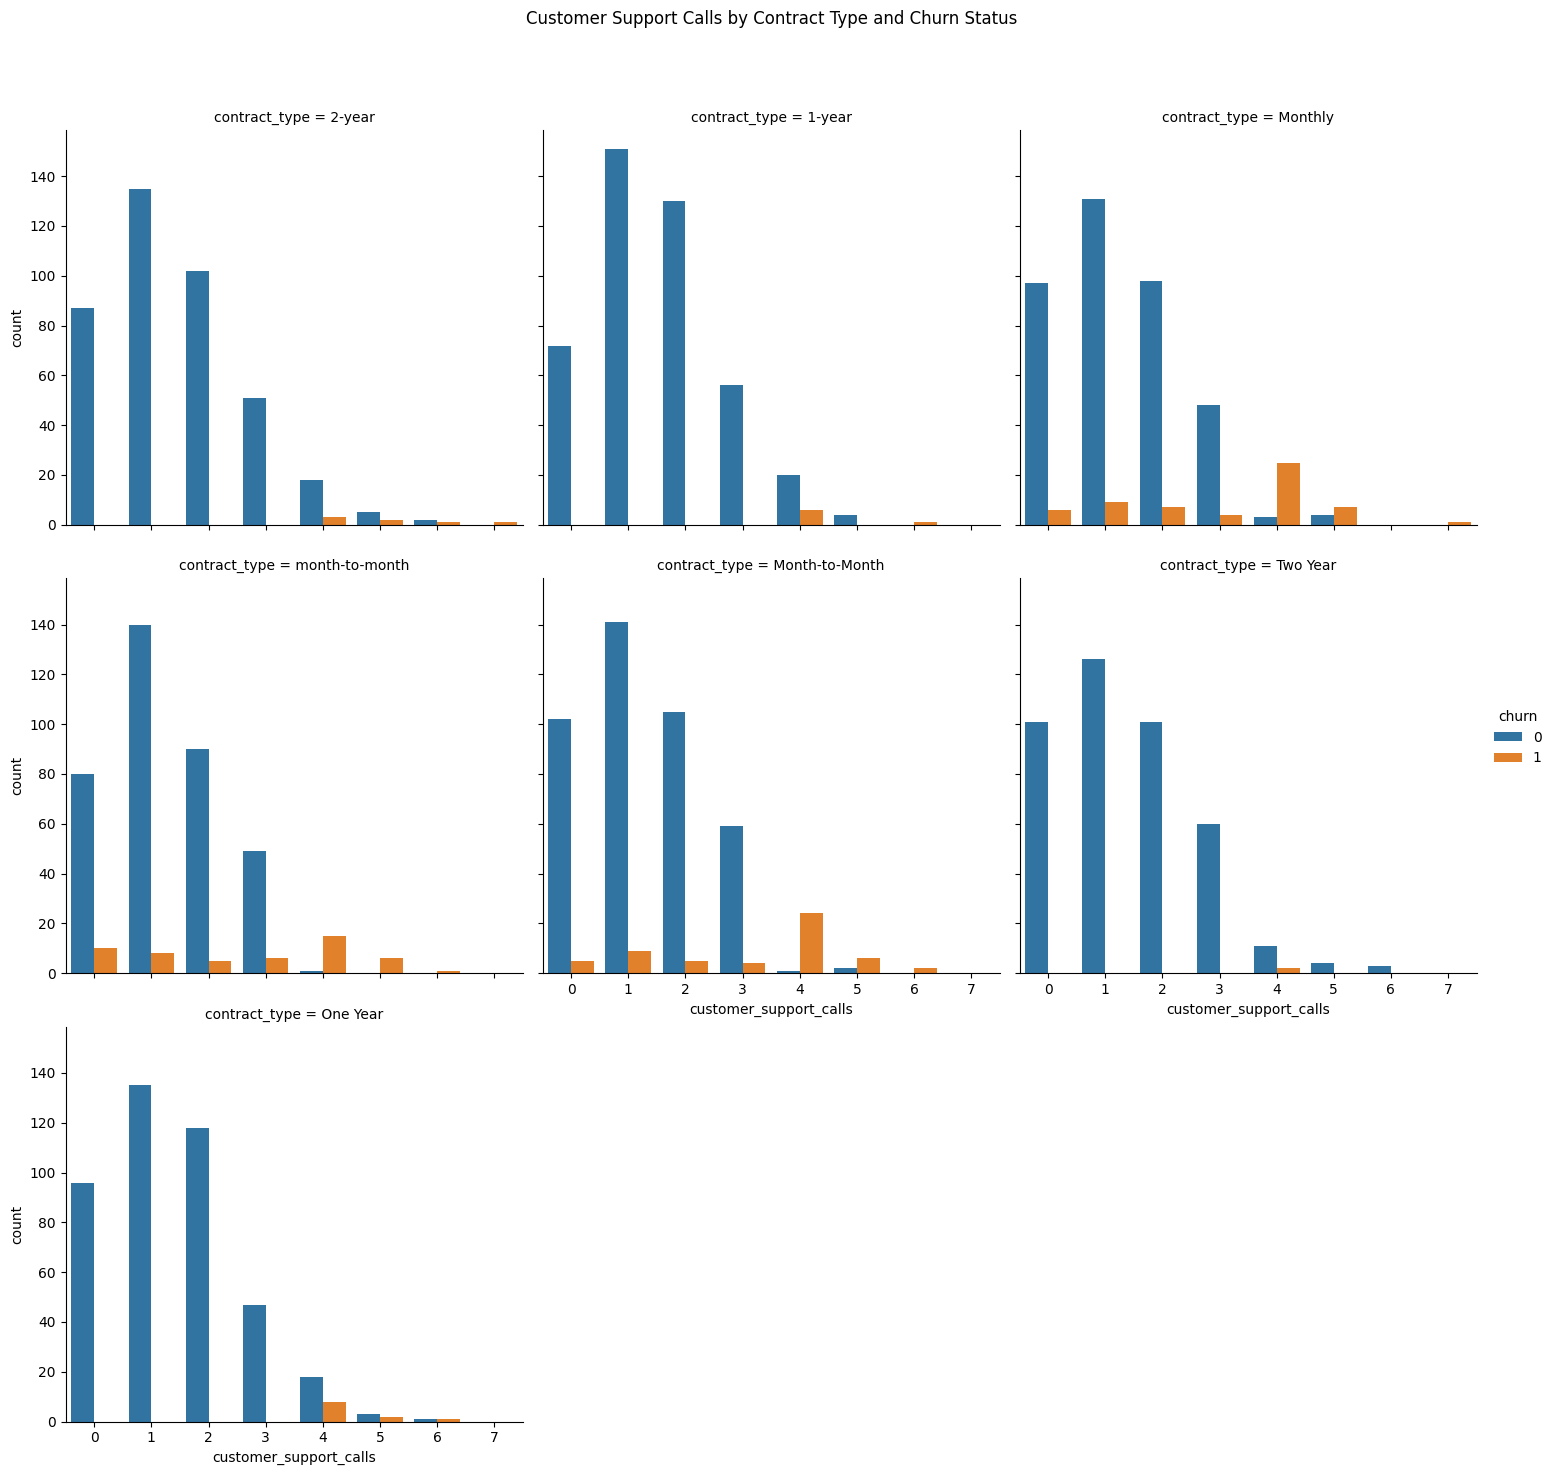

In [20]:
# Compare 'customer_support_calls' and 'contract_type' vs 'churn
plt.figure(figsize=(12, 8))
sns.catplot(data=df, x='customer_support_calls', hue='churn', col='contract_type', kind='count', col_wrap=3)
plt.subplots_adjust(top=0.9)
plt.suptitle('Customer Support Calls by Contract Type and Churn Status')
plt.show()

- It appears that as customer support calls increase, the likelihood of churn also increases, particularly for month-to-month contracts. This suggests that customers with month-to-month contracts who frequently contact customer support may be more dissatisfied and thus more likely to churn. In contrast, customers with longer-term contracts (1-year and 2-year) show a lower churn rate even with higher support calls, indicating that contract type plays a significant role in customer retention.

### **Task 3 (continued). Data Preparation & Feature Engineering**

#### **Task 3b. Standardize Variable Values**
**Purpose:** Clean and standardize categorical variables before feature engineering

**Common Activities:**
- Standardize inconsistent formatting (e.g., "Month-to-Month" → "month_to_month")
- Fix typos and inconsistent casing
- Consolidate similar categories
- Clean string data (strip whitespace, special characters)

In [21]:
# Standardize 'contract_type' values
df['contract_type'] = df['contract_type'].str.lower().replace({
    'month-to-month': 'month_to_month',
    'monthly': 'month_to_month',
    'one year': '1_year',
    '1-year': '1_year',
    'two year': '2_year',
    '2-year': '2_year'
})

In [22]:
# Print standardized values
print("\nStandardized 'contract_type' values:")
print(df['contract_type'].value_counts())


Standardized 'contract_type' values:
contract_type
month_to_month    1316
1_year             869
2_year             815
Name: count, dtype: int64


#### **Task 3c. Feature Engineering**

In [23]:
# Create additional features out of existing ones

# 1. Bill Shock: High bill + low usage (matches churn logic: bill > 100 AND usage < 10)
df['bill_shock'] = ((df['monthly_bill'] > 100) & (df['total_data_usage_gb'] < 10)).astype(int)

# 2. High Support Calls: Threshold at >3 calls (matches churn logic)
df['high_support_calls'] = (df['customer_support_calls'] > 3).astype(int)

# 3. New Customer Risk: Low tenure customers are less loyal
df['new_customer'] = (df['tenure_months'] < 12).astype(int)

# 4. Value Ratio: Cost per GB of data used (high = poor value perception)
df['cost_per_gb'] = df['monthly_bill'] / (df['total_data_usage_gb'] + 1)  # +1 to avoid division by zero

# 5. Tenure Risk Score: Inverse of tenure impact (lower tenure = higher risk)
df['tenure_risk'] = 1 / (df['tenure_months'] + 1)

print("\nNew Features Created:")
print(df[['bill_shock', 'high_support_calls', 'new_customer', 'cost_per_gb', 'tenure_risk']].describe())


New Features Created:
        bill_shock  high_support_calls  new_customer  cost_per_gb  tenure_risk
count  3000.000000         3000.000000   3000.000000  3000.000000  3000.000000
mean      0.003333            0.071333      0.156333     2.381987     0.056670
std       0.057648            0.257424      0.363232     7.530281     0.082785
min       0.000000            0.000000      0.000000     0.196089     0.013889
25%       0.000000            0.000000      0.000000     0.904446     0.018182
50%       0.000000            0.000000      0.000000     1.376696     0.027027
75%       0.000000            0.000000      0.000000     2.036861     0.052632
max       1.000000            1.000000      1.000000   130.154287     0.500000


#### **Task 3c. First Iteration of Feature Selection**

#### **Task 3d. Investigate Features Further (Optional)**

#### **Task 3e. Outliers**

Outliers can have varying impacts depending on the modeling approach. Always visualize and assess outliers before modeling. Consider robust methods or transformations if outliers are present.

| Model               | Importance of Handling Outliers | Why?                                                                                                                                                                                                 |
|---------------------|---------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees (DT) | Low                             | Decision Trees split data based on thresholds, making them inherently robust to outliers. Extreme outliers may slightly influence split thresholds, especially in shallow trees.                    |
| Random Forests (RF) | Low to Moderate                 | Random Forests average predictions across multiple trees, reducing the influence of outliers. Consistent outliers across samples may slightly affect feature importance rankings.                   |
| Linear Regression   | High                            | Outliers can disproportionately influence the regression line, distorting coefficients and residuals, leading to poor model performance and interpretability.                                      |
| Logistic Regression | Moderate to High                | Outliers can affect the decision boundary, especially if they dominate the feature space. The sigmoid function reduces sensitivity, but extreme outliers can still skew predictions.               |
| XGBoost             | Moderate                        | XGBoost is generally robust to outliers due to its tree-based nature and regularization. However, dominant outliers can influence split thresholds and feature importance, especially early on.     |
| Statistical Testing | High                            | Outliers can strongly affect tests (t-tests, ANOVA, correlation) by inflating variance and distorting means. Non-parametric tests (e.g., Mann-Whitney U, Wilcoxon) are less sensitive. Always check for outliers and consider robust alternatives if needed. |

**Tip:**  
- Use boxplots or histograms to visually inspect outliers.
- Consider winsorizing, transformation, or robust models if outliers are problematic.

##### **Check for Outliers**

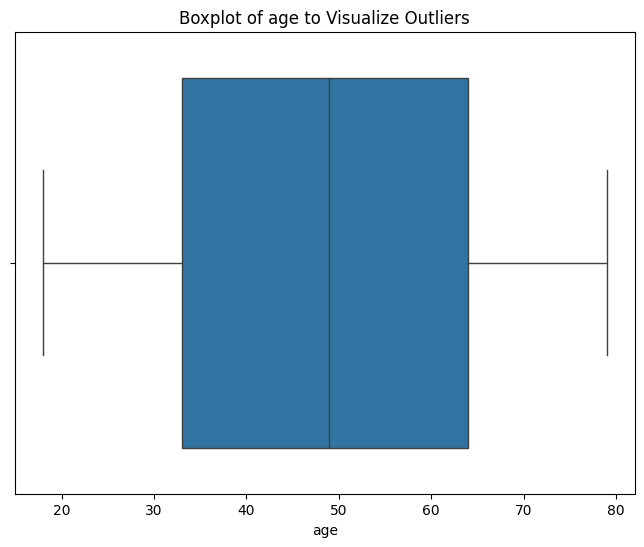

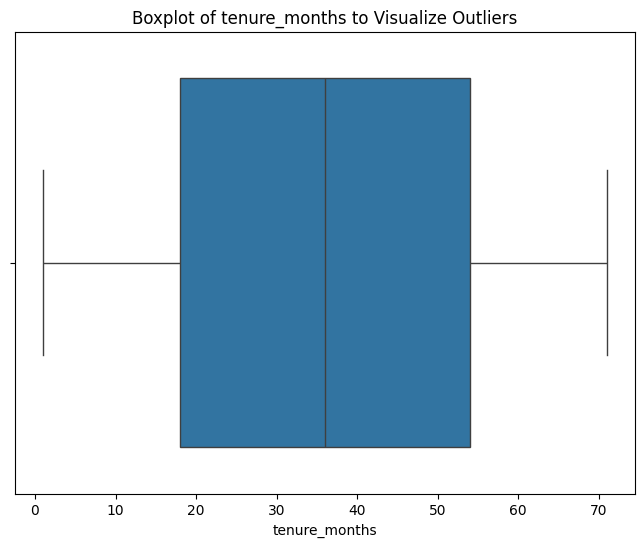

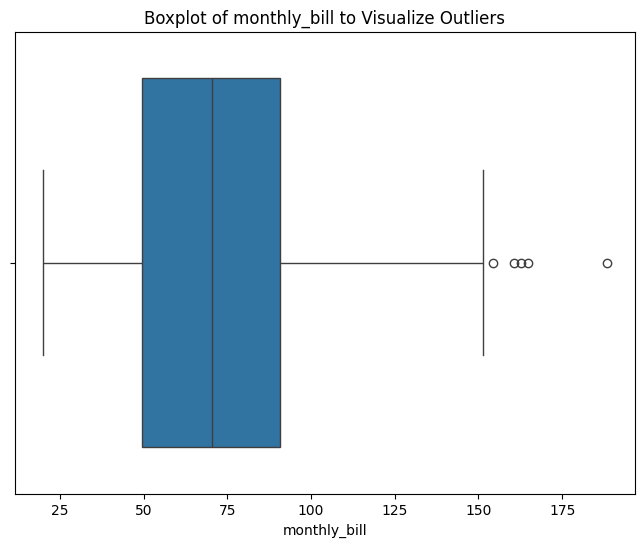

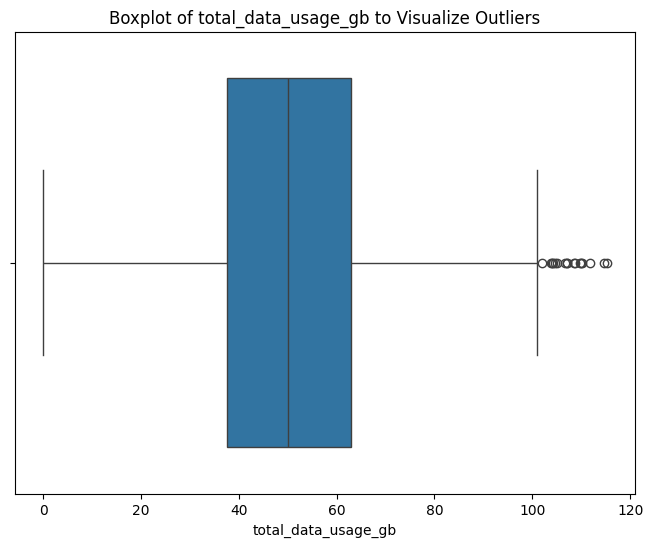

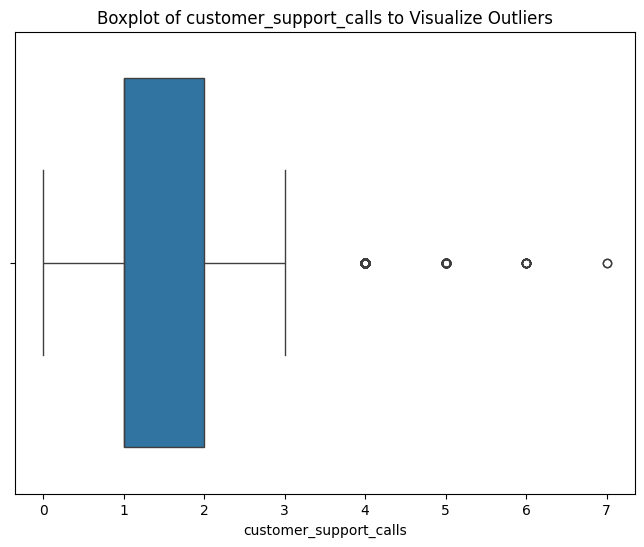

In [24]:
# Check for outliers in numeric features
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature} to Visualize Outliers')
    plt.xlabel(feature)
    plt.show()


##### **Manage Outliers**

#### **Task 3f. Check Assumptions (Data-Level)**

These checks are performed **before modeling** to:
- Validate suitability for statistical tests (t-tests, ANOVA, correlation)
- Guide data transformations and preprocessing
- Inform feature selection decisions

**Note:** For predictive models, model-specific assumptions (linearity, homoscedasticity of residuals, normality of residuals) are checked **after** model development in Task 4b using residual diagnostics.

##### **Normality**

##### Continuous Numeric Variables

##### Discrete Numeric Variables

##### **Homogeneity of Variance** *(Equal Variance)*

##### **Independence**

##### Testing for independence between variables and observations

##### **Sample Size**

In [25]:
# Check that sample size is sufficient for analysis
n_rows, n_cols = df.shape
print(f"\nDataset contains {n_rows} rows and {n_cols} columns.")


Dataset contains 3000 rows and 13 columns.


#### **Task 3g. Statistical Testing**

**Null Hypothesis (H₀):** There is no statistically significant difference in price between cars with and without an accident history.

**Alternative Hypothesis (Hₐ):** There is a statistically significant difference in price between cars with and without an accident history.

##### **Statistical Testing Metrics Reference** 📊

- **P-value:** Probability of observing results as extreme as those measured, assuming the null hypothesis is true (commonly, < 0.05 indicates statistical significance).
- **Z-statistic:** Standardized value showing how many standard deviations a sample mean is from the population mean; used for large samples or when population variance is known.
- **T-statistic:** Measures the difference between group means relative to sample variability; used for smaller samples or when population variance is unknown.
- **Effect Size (Cohen's d):** Quantifies the magnitude of the difference between groups, regardless of sample size.
  - Small: 0.2, Medium: 0.5, Large: 0.8
- **Confidence Interval:** Range of values within which the true population parameter is likely to fall, with a given level of confidence (e.g., 95%).
- **Statistical Power:** Probability that a test will detect a true effect when it exists (aim for 80%+ to reduce risk of Type II error).

*Tip: Always report both statistical significance (p-value) and practical significance (effect size/confidence interval) for context.*

##### **Run Statistical Tests**

##### **Check Statistical Significance of Numeric, Binary and Categorical Features**

| Method                        | Description                                                                 | Importance for Decision Trees (DT) | Importance for Random Forests (RF) | Importance for Linear Regression | Importance for Logistic Regression | Importance for XGBoost | Why?                                                                                                   |
|-------------------------------|-----------------------------------------------------------------------------|------------------------------------|------------------------------------|-----------------------------------|-------------------------------------|-------------------------|-------------------------------------------------------------------------------------------------------|
| Statistical Significance Tests | Evaluates the relationship between individual features and the target variable (e.g., t-tests, chi-square). | Low                                | Low to Moderate                   | High                              | High                                | Low to Moderate         | Essential for regression models to identify predictive features. For tree-based models, less critical due to built-in feature selection, but can help with interpretability and initial screening. |

##### **Check Statistical Significance of Features for Modeling**

In [26]:
# Check statistical significance of independent variables compared to dependent variable price to determine which can be dropped prior to modeling.
significant_features = []
for feature in df.columns:
    if feature != 'churn' and feature != 'customer_id':
        if df[feature].dtype in ['int64', 'float64']:
            # Numeric feature: t-test
            churned = df[df['churn'] == 1][feature]
            not_churned = df[df['churn'] == 0][feature]
            t_stat, p_value = stats.ttest_ind(churned, not_churned, equal_var=False)
        else:
            # Categorical feature: chi-squared test
            contingency_table = pd.crosstab(df[feature], df['churn'])
            chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        
        if p_value < 0.05:
            significant_features.append(feature)
            print(f"Feature '{feature}' is significant (p-value: {p_value:.4f})")
        else:
            print(f"Feature '{feature}' is NOT significant (p-value: {p_value:.4f})")

Feature 'age' is NOT significant (p-value: 0.6290)
Feature 'tenure_months' is significant (p-value: 0.0000)
Feature 'monthly_bill' is NOT significant (p-value: 0.1552)
Feature 'total_data_usage_gb' is NOT significant (p-value: 0.3472)
Feature 'customer_support_calls' is significant (p-value: 0.0000)
Feature 'contract_type' is significant (p-value: 0.0000)
Feature 'bill_shock' is NOT significant (p-value: 0.3087)
Feature 'high_support_calls' is significant (p-value: 0.0000)
Feature 'new_customer' is significant (p-value: 0.0000)
Feature 'cost_per_gb' is NOT significant (p-value: 0.2882)
Feature 'tenure_risk' is significant (p-value: 0.0000)


##### **Remove Statistically Insignificant Variables**

#### **Task 3h. Variable Skewness**

| Model                | Importance of Handling Skewness | Why?                                                                                                   |
|----------------------|---------------------------------|--------------------------------------------------------------------------------------------------------|
| Decision Trees (DT)  | Low                             | Decision Trees split data by thresholds and are robust to skewed distributions. Extreme skewness may cause imbalanced splits or affect interpretability. |
| Random Forests (RF)  | Low                             | Random Forests inherit robustness from Decision Trees. Severe skewness is rarely problematic but can occasionally contribute to overfitting or biased feature importance. |
| Linear Regression    | High                            | Linear Regression is sensitive to skewed features, which can distort coefficients and residuals. Transformations (e.g., log, Box-Cox) are often necessary for valid inference. |
| Logistic Regression  | High                            | Logistic Regression assumes linearity in the logit; skewed features can reduce model accuracy and interpretability. Transformations are recommended. |
| XGBoost              | Moderate                        | XGBoost is robust to skewness due to its tree-based nature, but highly skewed features can influence split thresholds or dominate feature importance. Transformations may improve results. |

##### **Check Variable Skewness**

In [27]:
# Check skewness of all numeric variables.
for feature in df.select_dtypes(include=[np.number]).columns:
    if feature not in ['customer_id', 'churn']:
        skewness = df[feature].skew()
        if abs(skewness) > 0.75:
            print(f"\n{feature} is highly skewed (skewness: {skewness}). Consider transformation.")


customer_support_calls is highly skewed (skewness: 0.7766334220501312). Consider transformation.

bill_shock is highly skewed (skewness: 17.242407373949813). Consider transformation.

high_support_calls is highly skewed (skewness: 3.3326580380389923). Consider transformation.

new_customer is highly skewed (skewness: 1.8935352691490788). Consider transformation.

cost_per_gb is highly skewed (skewness: 11.247319275148461). Consider transformation.

tenure_risk is highly skewed (skewness: 3.6740214295006552). Consider transformation.


- It appears there is moderate skew in the 'customer_support_calls' variable, with a longer tail on the right side of the distribution. Since tree-based models will be primarily used, this skewness is less concerning, but it may still be beneficial to consider transformations or robust modeling techniques if performance issues arise.

##### **Manage Variable Skewness**

#### **Task 3i. Encode Features**

In [28]:
# Encode categorical variables for modeling
df = pd.get_dummies(df, columns=['contract_type'], drop_first=True, dtype=int)

In [29]:
# Print dataset after preprocessing
print("\nDataset after preprocessing:")
print(df.head())


Dataset after preprocessing:
   customer_id  age  tenure_months  monthly_bill  total_data_usage_gb  \
0         1001   19             42     45.422406            28.050591   
1         1002   53             41     78.016864            55.702603   
2         1003   75              4     67.011073            74.798731   
3         1004   58             51     43.303750            39.913597   
4         1005   27             43    104.898819            78.216551   

   customer_support_calls  churn  bill_shock  high_support_calls  \
0                       1      0           0                   0   
1                       2      0           0                   0   
2                       1      0           0                   0   
3                       1      0           0                   0   
4                       1      0           0                   0   

   new_customer  cost_per_gb  tenure_risk  contract_type_2_year  \
0             0     1.563562     0.023256              

#### **Task 3j. Remove Highly Correlated Features (Correlation Heatmaps & VIF)**

| Model Type           | Importance | Why?                                                                                                                                                                                                  |
|----------------------|------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Decision Trees       | Moderate   | Decision Trees are not sensitive to multicollinearity for prediction, but correlated features can affect feature importance rankings, which matters for interpretation and feature selection.           |
| Random Forests       | Low        | Random Forests are robust to multicollinearity, but correlated features may still bias feature importance scores. Consider removing highly correlated features if interpretability is important.      |
| Linear Regression    | High       | Multicollinearity causes unstable coefficients, inflated standard errors, and unreliable interpretations. VIF is critical for diagnosing and addressing this issue.                                   |
| Logistic Regression  | High       | Like linear regression, logistic regression is sensitive to multicollinearity, leading to unstable coefficients and interpretability challenges. VIF is an important diagnostic tool.                 |
| XGBoost              | Low        | XGBoost is generally robust to multicollinearity due to tree-based splits and built-in regularization (L1/L2). Correlated features may affect feature importance but rarely degrade predictive power. |

**Notes:**
1. For tree-based models, multicollinearity does not harm predictive performance but can bias feature importance, which is relevant for interpretation.
2. For regression models, always check VIF and remove/reduce highly correlated features.
3. For XGBoost, regularization helps, but review feature importance for interpretability.

##### **Check for Multicollinearity with Correlation Heatmaps**

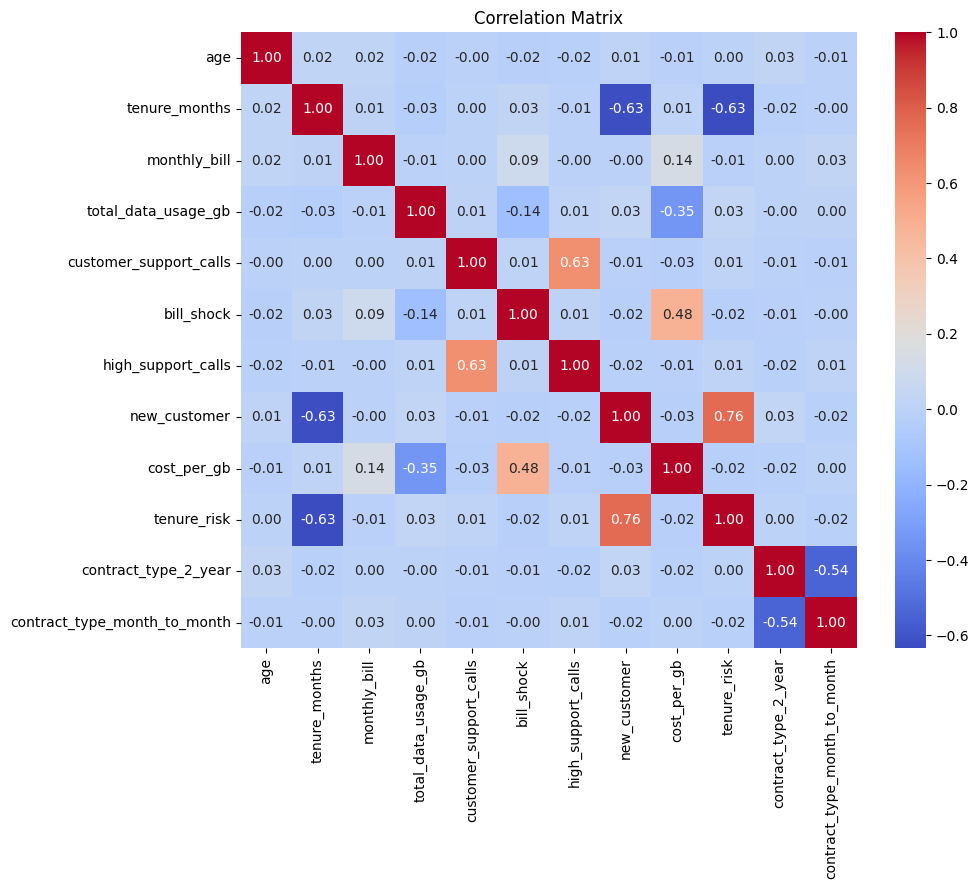

In [30]:
# Check for multicollinearity among independent variables with a correlation matrix plot.
plt.figure(figsize=(10, 8))
corr_matrix = df.drop(columns=['customer_id', 'churn']).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

##### **Check For Multicollinearity (VIF)**

In [31]:
# Check for multicollinearity with VIF.
X = df.drop(columns=['customer_id', 'churn'])
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
                         feature       VIF
0                            age  6.805394
1                  tenure_months  5.595839
2                   monthly_bill  6.144075
3            total_data_usage_gb  6.649386
4         customer_support_calls  3.994997
5                     bill_shock  1.313210
6             high_support_calls  1.775565
7                   new_customer  3.072873
8                    cost_per_gb  1.571069
9                    tenure_risk  3.656897
10          contract_type_2_year  1.853923
11  contract_type_month_to_month  2.367882


##### **Remove Highly Correlated Features**

---
### ***End of Analyze Section Insights***

**Data Quality & Transformations**
- What data quality issues were discovered and how were they addressed?
    - Missing values in total_data_usage_gb (addressed with KNN imputation), outliers in monthly_bill (monitored but not removed for tree-based models), skewness in customer_support_calls (acceptable for tree-based models), and class imbalance in the churn variable (to be addressed during modeling).
- What transformations or feature engineering did you apply? Why?
    - Contract type standardization was applied to consolidate inconsistent category names. Created engineered features (bill_shock, high_support_calls, new_customer, cost_per_gb, tenure_risk) to capture domain-relevant patterns.
- What limitations remain in the data after cleaning?
    - The class imbalance in the target variable remains a challenge that needs to be addressed during model training.

**Key Patterns & Findings**
- What are the most important patterns or relationships discovered during EDA?
    - Customers who churn tend to have higher monthly bills, make more customer support calls, and have shorter tenure. Month-to-month contracts show higher churn rates than longer-term contracts.
- Which features appear most relevant to the target variable?
    - Customer support calls and contract type are expected to be predictive based on EDA visualizations and statistical significance tests.
- Were there any surprising or unexpected findings?
    - The strong interaction between contract type and support calls on churn was notable—month-to-month customers with high support calls showed particularly elevated churn risk.

**Assumptions & Validation**
- What statistical assumptions were tested? Were any violated?
    - Tested for normality, checked for multicollinearity (VIF), and assessed statistical significance of features. No critical violations for tree-based modeling approach.
- Are there assumptions made during EDA that should be revisited during modeling?
    - Assumptions regarding the normality of certain features and the independence of observations should be revisited during model diagnostics.

**Readiness for Modeling**
- What modeling challenges do you anticipate based on your EDA findings?
    - Class imbalance may lead to biased predictions if not properly addressed through resampling techniques or class weighting.
- How will your EDA findings influence your choice of modeling techniques?
    - The presence of class imbalance suggests that models robust to imbalance (e.g., Random Forest with class weighting, XGBoost with scale_pos_weight) will be prioritized.
- What is your plan if initial models do not perform as expected?
    - Revisit feature engineering, consider additional data transformations, and explore alternative modeling techniques or hyperparameter tuning.

**Ethics & Bias**
- Are there any features that may introduce bias or ethical concerns?
    - At this point in time, it doesn't appear that any features may introduce bias or ethical concerns.

#### **Save Analysis-Ready Dataset**

**Checkpoint:** Save your fully prepared dataset with all transformations, feature engineering, and cleaning applied. This dataset is ready for modeling.

**Recommended naming:** `{project_name}_analysis_ready.csv` or `.pkl`

In [32]:
# Save the dataset.
df.to_csv('telecom_churn_prediction.csv', index=False)

---
### **Transition to Construct**

With your data prepared and features selected, proceed to model development, validation, and post-model assumption testing.

**✅ Before proceeding, ensure you have:**
- ✓ Completed data cleaning (missing values, duplicates, outliers handled)
- ✓ Performed comprehensive EDA with visualizations
- ✓ Engineered and selected relevant features
- ✓ Checked statistical assumptions and conducted tests
- ✓ Addressed class imbalance if applicable
- ✓ Saved analysis-ready dataset

**📋 Deliverables from Analyze stage:**
- Clean, transformed dataset ready for modeling
- EDA insights and patterns documented
- Statistical test results (if applicable)
- Feature engineering rationale
- List of features selected for modeling

<img src="images/Construct.png" width="75" height="75" align=left>

## **paCe: Construct**

#### **Questions to reflect on during the Construct stage** 💭

**Strategy & Validation**
- What modeling approaches fit your data characteristics and business objectives?
- How will you validate performance (cross-validation strategy, holdout set)?
- How will you address data challenges from Analyze (e.g., class imbalance)?

**During Model Development**
- Is there evidence of overfitting or underfitting? How will you diagnose it?
- Are any features behaving unexpectedly during training?
- Do results align with your EDA findings and domain knowledge?

**Readiness & Limitations**
- Does the champion model meet your success criteria from the Plan stage?
- What are the key limitations or failure modes of your model(s)?
- Is the model ready for stakeholder review?

**Ethics**
- Could the model produce biased or unfair predictions for certain groups?

### **Task 4. Model Development**

#### **Task 4a. Prepare Data for Modeling**

**Key Activities:**
- Define features (X) and target variable (y)
- Split data into training and test sets
- Set up cross-validation strategy
- Apply feature scaling/normalization if needed (for regression models)
- Handle any remaining data preparation specific to modeling

**Best Practices:**
- Use stratified split for classification to preserve class distribution
- Typical split: 70-80% training, 20-30% test
- Set random_state for reproducibility
- Ensure no data leakage (fit transformations only on training data)

**Note:** For tree-based models (DT, RF, XGBoost), feature scaling is not required.

##### **Split Data into Training and Test Sets**

In [33]:
# Split the data into training and testing sets
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

##### **Manage Class Imbalance (if applicable)**

Class imbalance is handled **within each model's development section** using one of these approaches:

| Approach | Best For | Implementation |
|----------|----------|----------------|
| `class_weight='balanced'` | Random Forest, Logistic Regression | Built-in parameter |
| `scale_pos_weight` | XGBoost | Built-in parameter |
| SMOTE Pipeline | Any model | Use `imblearn.Pipeline` within model cell |

**Note:** Choose ONE approach per model. Using both class weighting AND SMOTE can over-correct.

#### **Model Selection Guidance** 🎯

**Quick Model Selection Guide:**

| Issue                   | Linear/Logistic Regression                | Tree-Based Models (DT/RF/XGBoost)           |
|-------------------------|-------------------------------------------|---------------------------------------------|
| **Multicollinearity**   | ⚠️ **Critical** – Remove correlated features | ✅ **Low impact** – Models handle naturally  |
| **Feature Scaling**     | ⚠️ **Required** – Standardize features      | ✅ **Not needed** – Tree splits are scale-invariant |
| **Missing Values**      | ⚠️ **Must handle** – Impute before modeling | 🔶 **Some tolerance** – XGBoost handles natively |
| **Outliers**            | ⚠️ **Sensitive** – Consider removal/transformation | ✅ **Robust** – Tree splits minimize impact  |
| **Feature Interactions**| ⚠️ **Manual** – Must engineer interactions | ✅ **Automatic** – Naturally captures interactions |
| **Interpretability**    | ✅ **High** – Clear coefficient interpretation | 🔶 **Medium** – Feature importance available |

**Choose Linear/Logistic when:** You need high interpretability and have clean, well-prepared data.

**Choose Tree-based when:** You want robustness, automatic feature handling, and strong predictive performance.

*Tip: Consider your business objectives, data quality, and need for interpretability when selecting a model.*

#### **Task 4b. Build and Iterate Models**

**Key Activities:**
- Select appropriate modeling techniques based on data characteristics and business objectives
- Build and tune initial models using cross-validation and hyperparameter optimization
- Check model assumptions and diagnose potential issues (e.g., overfitting, multicollinearity, class imbalance)
- Evaluate model performance using relevant metrics (e.g., accuracy, recall, AUC, F1-score)
- Iterate on feature selection and model parameters to improve performance

##### **Model Evaluation & Feature Selection Reference** 📊

**Classification Metrics:**
| Metric | Focus | Use When | Interpretation |
|--------|-------|----------|----------------|
| **AUC-ROC** | Class separation | Overall discrimination | 0.5 = random, 0.7-0.8 = acceptable, >0.8 = excellent |
| **Precision** | False positives | Cost of false alarms high | TP / (TP + FP) — "Of predicted positives, how many correct?" |
| **Recall** | False negatives | Missing positives costly | TP / (TP + FN) — "Of actual positives, how many caught?" |
| **F1-Score** | Balance P & R | Imbalanced classes | Harmonic mean of precision & recall |

**Regression Metrics:**
| Metric | Focus | Interpretation |
|--------|-------|----------------|
| **RMSE** | Large errors | Same units as target; penalizes big misses |
| **MAE** | Typical error | Same units as target; robust to outliers |
| **R²** | Variance explained | 0-1 scale; >0.7 generally good |

---

**Feature Importance Methods:**
| Method | DT | RF | LogReg | XGBoost | Notes |
|--------|:--:|:--:|:------:|:-------:|-------|
| Gini/Gain Importance | ✓ | ✓ | — | ✓ | Built-in; fast but biased toward high-cardinality features |
| Permutation Importance | ✓ | ✓ | ✓ | ✓ | Model-agnostic; slower but more reliable |
| SHAP Values | ✓ | ✓ | ✓ | ✓ | Shows direction + magnitude; best for interpretation |
| Coefficients | — | — | ✓ | — | Requires standardized features for comparison |

**Feature Selection Methods:**
| Method | Computational Cost | Best For | Considerations |
|--------|:------------------:|----------|----------------|
| Importance Threshold | Low | Fast screening, many features | May miss feature interactions |
| RFE (Recursive) | High | Capturing interactions | Computationally expensive |
| RFECV (with CV) | Very High | Automated optimal selection | Most robust; use for final selection |

*Tip: For churn prediction, prioritize **recall** to catch at-risk customers, then balance with precision based on intervention costs.*

##### **Linear Regression**

##### Build the Model

##### Model Evaluation

**Residual Analysis**

**Feature Importance Analysis (Coefficients)**

**Feature Selection (RFECV)**

**Reduced vs Full Model Comparison**

##### Test Model Assumptions 📊

After developing your linear regression model, check the following assumptions:

**Linearity & Homoscedasticity** (combined check)
- Residuals should scatter randomly around zero with consistent spread
- *Check with residual vs. fitted value plots*

**Independence of Residuals**
- Residuals are independent (no autocorrelation)
- *Test with autocorrelation plot or Durbin-Watson statistic*

**Normality of Residuals**
- Residuals are approximately normally distributed
- *Assess with Q-Q plots or Shapiro-Wilk test*

**No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

*Tip: Violations may require data transformation, feature engineering, or alternative modeling approaches.*

##### **Logistic Regression**

##### Build the Model

##### Model Evaluation

**Threshold Tuning**

**Feature Importance Analysis**

**Feature Selection (RFECV)**

**Reduced vs Full Model Comparison**

##### Test Model Assumptions 📊

After developing your logistic regression model, check the following assumptions:

**1. Linearity of the Logit**
- Predictors have a linear relationship with the log odds of the outcome
- *Check with Box-Tidwell test or by plotting predictor vs. logit*

**2. Independence of Observations**
- Observations are independent of each other (no clustering or autocorrelation)
- *Consider data collection method and temporal dependencies*

**3. No Multicollinearity**
- Predictors are not highly correlated with each other
- *Already verified in Task 3j with VIF - reference those results*

**4. No Extreme Outliers or Influential Points**
- Outliers do not unduly influence the model
- *Assess with Cook's distance, leverage plots, and standardized residuals*

**5. Large Sample Size**
- Sufficient data for stable coefficient estimates
- *Rule of thumb: ≥10-15 events per predictor variable for each outcome class*

**6. Binary or Ordinal Outcome**
- Dependent variable must be binary (or ordinal for ordinal logistic regression)
- *Verify target variable has exactly 2 classes*

*Tip: Violations may require data transformation, removing influential observations, regularization (L1/L2), or alternative modeling approaches.*

##### **Decision Tree**

##### Build the Model


##### Model Evaluation

**Threshold Tuning**

**Feature Importance Analysis**

**Feature Selection (RFECV)**

**Generate SHAP Values for Feature Importance**


##### Test Model Assumptions 🌳

After developing your decision tree model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits and avoid overfitting
- *Ensure each terminal node has sufficient observations (min_samples_leaf)*

**2. Feature Relevance**
- Important features are included; irrelevant features may reduce performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training data rather than learn patterns
- *Use cross-validation, prune tree, or limit max_depth and min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias splits toward majority class
- *Use class_weight='balanced', SMOTE, or stratified sampling*

**5. No Multicollinearity Requirement**
- Trees handle correlated features naturally
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically and validate with domain knowledge*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Decision Trees:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

##### **Random Forest**

##### Build the Model

In [34]:
# =============================================================================
# BUILD RANDOM FOREST MODEL
# =============================================================================
RANDOM_STATE = 99

param_grid_rf = {
    'n_estimators': [200],
    'max_depth': [6],
    'min_samples_split': [20],
    'min_samples_leaf': [15],
    'max_features': [0.3],
    'max_samples': [0.7],
}

rf_model = RandomForestClassifier(
    random_state=RANDOM_STATE, n_jobs=-1, oob_score=True,
    class_weight='balanced', ccp_alpha=0.01
)

grid_search_rf = GridSearchCV(
    rf_model, param_grid_rf, scoring='f1', cv=5,
    n_jobs=-1, verbose=2, return_train_score=True
)
grid_search_rf.fit(X_train, y_train)

# --- RESULTS ---
print(f"Best Params: {grid_search_rf.best_params_}")
print(f"Best CV F1: {grid_search_rf.best_score_:.4f}")
print(f"OOB Score: {grid_search_rf.best_estimator_.oob_score_:.4f}")

# Overfitting check
best_idx = grid_search_rf.best_index_
gap = grid_search_rf.cv_results_['mean_train_score'][best_idx] - grid_search_rf.cv_results_['mean_test_score'][best_idx]
print(f"Train-CV Gap: {gap:.4f} {'⚠️ Overfit' if gap > 0.05 else '✅ OK'}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Params: {'max_depth': 6, 'max_features': 0.3, 'max_samples': 0.7, 'min_samples_leaf': 15, 'min_samples_split': 20, 'n_estimators': 200}
Best CV F1: 0.4864
OOB Score: 0.8650
Train-CV Gap: 0.0079 ✅ OK


##### Model Evaluation

**Threshold Tuning**

Optimal Threshold: 0.651 (default: 0.500)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       562
           1       0.47      0.76      0.58        38

    accuracy                           0.93       600
   macro avg       0.73      0.85      0.77       600
weighted avg       0.95      0.93      0.94       600



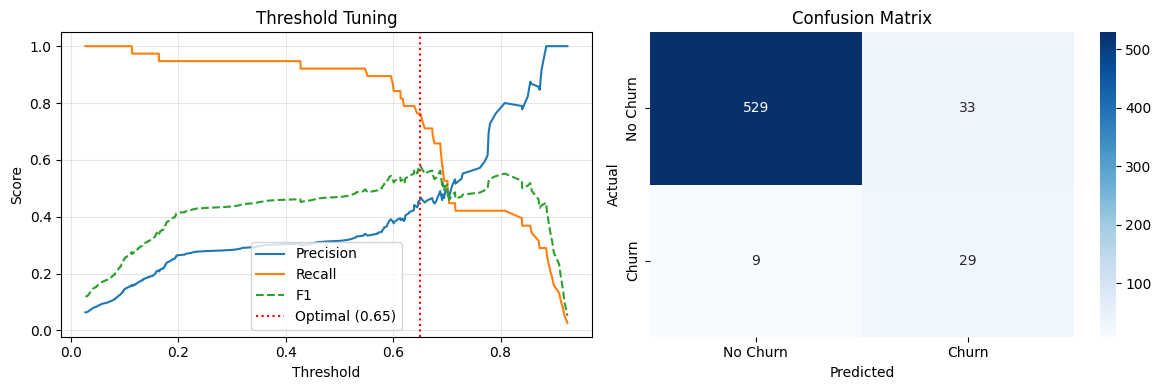

In [35]:
# --- THRESHOLD TUNING ---
y_proba = grid_search_rf.best_estimator_.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precision[:-1] * recall[:-1]) / (precision[:-1] + recall[:-1] + 1e-10)
optimal_threshold = thresholds[np.argmax(f1_scores)]
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print(f"Optimal Threshold: {optimal_threshold:.3f} (default: 0.500)")
print(f"\n{classification_report(y_test, y_pred_optimal)}")

# --- VISUALIZATIONS ---
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Precision-Recall Tradeoff
axes[0].plot(thresholds, precision[:-1], label='Precision')
axes[0].plot(thresholds, recall[:-1], label='Recall')
axes[0].plot(thresholds, f1_scores, '--', label='F1')
axes[0].axvline(optimal_threshold, color='r', linestyle=':', label=f'Optimal ({optimal_threshold:.2f})')
axes[0].set(xlabel='Threshold', ylabel='Score', title='Threshold Tuning')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_optimal), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'], ax=axes[1])
axes[1].set(title='Confusion Matrix', xlabel='Predicted', ylabel='Actual')

plt.tight_layout()
plt.show()

- After applying threshold tuning, both Recall and F1-Score for Class 1 improved, indicating better performance in identifying churned customers. The AUC-ROC also increased, suggesting improved overall discrimination between classes.

**Feature Importance Analysis**

In [36]:
# =============================================================================
# FEATURE IMPORTANCE ANALYSIS
# =============================================================================
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': grid_search_rf.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False)

# --- SUMMARY ---
print(feature_importance.to_string(index=False))

                     feature  importance
      customer_support_calls    0.270799
          high_support_calls    0.261292
contract_type_month_to_month    0.152118
                 tenure_risk    0.119754
               tenure_months    0.094803
        contract_type_2_year    0.033544
                new_customer    0.020735
         total_data_usage_gb    0.018864
                 cost_per_gb    0.009659
                         age    0.009331
                monthly_bill    0.009102
                  bill_shock    0.000000


**Feature Selection (RFECV)**

Features: 12 → 6 (removed: ['age', 'monthly_bill', 'bill_shock', 'new_customer', 'cost_per_gb', 'contract_type_2_year'])


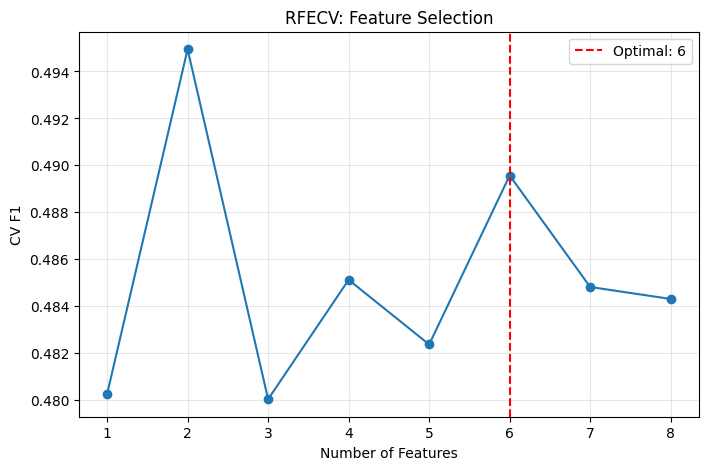


✅ Selected: ['tenure_months', 'total_data_usage_gb', 'customer_support_calls', 'high_support_calls', 'tenure_risk', 'contract_type_month_to_month']


In [37]:
# =============================================================================
# RFECV FEATURE SELECTION
# =============================================================================
rf_for_rfe = RandomForestClassifier(
    n_estimators=100, max_depth=6, min_samples_leaf=15,
    random_state=RANDOM_STATE, n_jobs=-1, class_weight='balanced'
)

rfecv = RFECV(estimator=rf_for_rfe, step=1, cv=5, 
              scoring='f1', min_features_to_select=5, n_jobs=-1)
rfecv.fit(X_train, y_train)

# --- RESULTS ---
selected_features = list(X_train.columns[rfecv.support_])
removed_features = list(X_train.columns[~rfecv.support_])

print(f"Features: {X_train.shape[1]} → {rfecv.n_features_} (removed: {removed_features})")

# --- VISUALIZATION ---
cv_scores = rfecv.cv_results_['mean_test_score']
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o')
plt.axvline(rfecv.n_features_, color='r', linestyle='--', label=f'Optimal: {rfecv.n_features_}')
plt.xlabel('Number of Features')
plt.ylabel('CV F1')
plt.title('RFECV: Feature Selection')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- CREATE REDUCED DATASETS ---
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

print(f"\n✅ Selected: {selected_features}")

**Reduced vs Full Model Comparison**

In [38]:
# =============================================================================
# RETRAIN & COMPARE: REDUCED vs FULL FEATURE SET
# =============================================================================

# Build reduced model with same hyperparameters
rf_reduced = RandomForestClassifier(
    **grid_search_rf.best_params_,
    random_state=RANDOM_STATE,
    n_jobs=-1,
    class_weight='balanced',
    ccp_alpha=0.01
)
rf_reduced.fit(X_train_reduced, y_train)

# Predict with same threshold as full model
y_pred_reduced = (rf_reduced.predict_proba(X_test_reduced)[:, 1] >= optimal_threshold).astype(int)

# --- COMPARISON TABLE ---
metrics = {
    'Full Model': [precision_score(y_test, y_pred_optimal), 
                   recall_score(y_test, y_pred_optimal), 
                   f1_score(y_test, y_pred_optimal)],
    'Reduced': [precision_score(y_test, y_pred_reduced), 
                recall_score(y_test, y_pred_reduced), 
                f1_score(y_test, y_pred_reduced)]
}
comparison_df = pd.DataFrame(metrics, index=['Precision', 'Recall', 'F1-Score'])
comparison_df['Difference'] = comparison_df['Reduced'] - comparison_df['Full Model']

print(f"Features: {X_train.shape[1]} → {len(selected_features)} (removed: {removed_features})")
print(f"\n{comparison_df.round(3).to_string()}")

# --- DECISION ---
recall_drop = -comparison_df.loc['Recall', 'Difference']
USE_REDUCED = recall_drop <= 0.10

print(f"\n{'✅ ACCEPT' if USE_REDUCED else '❌ REJECT'} reduced model (Recall drop: {recall_drop:.1%})")

Features: 12 → 6 (removed: ['age', 'monthly_bill', 'bill_shock', 'new_customer', 'cost_per_gb', 'contract_type_2_year'])

           Full Model  Reduced  Difference
Precision       0.468    0.465      -0.003
Recall          0.763    0.526      -0.237
F1-Score        0.580    0.494      -0.086

❌ REJECT reduced model (Recall drop: 23.7%)


##### Feature Selection Conclusion

RFECV selected 6 features, but the reduced model showed degraded performance:
- Recall dropped from **0.76 → 0.53** (-23%)
- F1 dropped from **0.58 → 0.49** (-9%)

**Decision:** Retain full feature set for champion model. The removed features (`monthly_bill`, `bill_shock`, `cost_per_gb`, `age`, `new_customer`) contribute meaningful collective signal even though individual importance was low.

**Lesson:** Low individual feature importance ≠ safe to remove. Features can have synergistic effects captured by ensemble methods.

**Generate SHAP (SHapley Additive exPlanations**)

C:\Users\Personal\AppData\Local\Temp\ipykernel_25920\1694342099.py:15: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_churn, X_test, show=False)


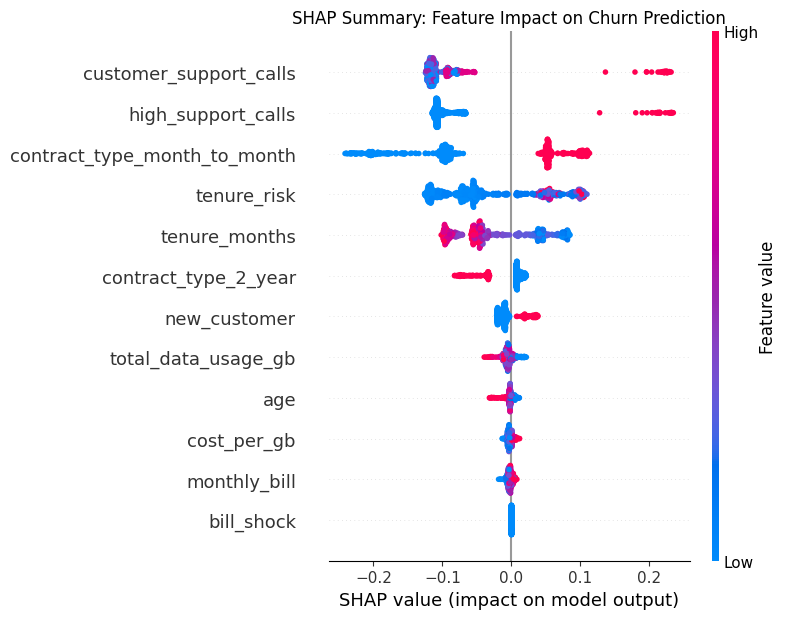

In [39]:
# =============================================================================
# SHAP ANALYSIS - FEATURE IMPACT VISUALIZATION
# =============================================================================

# Create SHAP explainer (use TreeExplainer for Random Forest)
explainer = shap.TreeExplainer(grid_search_rf.best_estimator_)
shap_values = explainer.shap_values(X_test)

# For binary classification, use class 1 (churn) SHAP values
shap_values_churn = shap_values[:, :, 1] if len(shap_values.shape) == 3 else shap_values[1]

# --- PRIMARY: Summary Plot (Beeswarm) ---
# Shows ranking + direction + magnitude for all features
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_churn, X_test, show=False)
plt.title('SHAP Summary: Feature Impact on Churn Prediction')
plt.tight_layout()
plt.show()

- The SHAP results indicate that 'customer_support_calls' and 'contract_type' are the most influential features driving churn predictions in the Random Forest model. High values of 'customer_support_calls' (red points on the right) significantly increase the likelihood of churn, while certain contract types also play a crucial role. Other features like 'monthly_bill' and 'data_usage_gb' have moderate impacts, suggesting they contribute to the model's decisions but are less critical than the top features.

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

##### Save Model Results and Scores

In [37]:
# =============================================================================
# INITIALIZE TRACKER (run once at start of notebook)
# =============================================================================
model_scores = []

In [38]:
# --- LOG RESULTS (add after evaluation) ---
model_scores.append({
    'model': 'RF_v1',
    'threshold': round(optimal_threshold, 3),
    'precision': round(precision_score(y_test, y_pred_optimal), 3),
    'recall': round(recall_score(y_test, y_pred_optimal), 3),
    'f1': round(f1_score(y_test, y_pred_optimal), 3)
})

print("\nModel Scores Tracker:")
for score in model_scores:
    print(score)


Model Scores Tracker:
{'model': 'RF_v1', 'threshold': np.float64(0.651), 'precision': 0.468, 'recall': 0.763, 'f1': 0.58}


##### **XGBoost**

##### Buld the Model

##### Model Evaluation

**Threshold Tuning**

**Feature Importance Analysis**

**Remove Features with Low Importance**

**Feature Selection (RFECV)**

**Reduced vs Full Model Comparison**

**Generate SHAP (SHapley Additive exPlanations**)

##### Test Model Assumptions 🌲

After developing your random forest model, consider the following best practices and checks:

**1. Sufficient Sample Size**
- Adequate data to create meaningful splits across multiple trees
- *Ensure sufficient observations per terminal node across the forest*

**2. Feature Relevance**
- Important features are included; irrelevant features may dilute performance
- *Review feature importance scores and remove low-impact features*

**3. Check for Overfitting**
- Model may memorize training patterns despite ensemble averaging
- *Use out-of-bag (OOB) error, cross-validation, or limit n_estimators, max_depth, min_samples_split*

**4. Handle Class Imbalance (Classification)**
- Severe imbalance can bias predictions toward majority class
- *Use class_weight='balanced', balanced_subsample, or SMOTE*

**5. No Multicollinearity Requirement**
- Random forests handle correlated features naturally through random feature selection
- *Note: Correlated features may affect feature importance interpretation*

**6. Interpretability Considerations**
- Feature importance may favor high-cardinality or continuous variables
- *Review importance scores critically, validate with domain knowledge, and consider permutation importance*

**7. Hyperparameter Tuning**
- Model performance depends on proper parameter selection
- *Use GridSearchCV or RandomizedSearchCV for n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features*

**8. Validation Strategy**
- Always evaluate on holdout/test set to assess generalization
- *Check for data leakage and ensure train/test split is representative*

**Advantages of Random Forests:**
- No distributional assumptions (normality, homoscedasticity not required)
- Robust to outliers due to ensemble averaging and threshold-based splits
- Handles missing values (some implementations)
- Captures non-linear relationships and feature interactions automatically
- Reduces overfitting compared to single decision trees

*Tip: Document any assumption violations and mitigation steps for transparency and reproducibility.*

---
### ***End of Construct Section Insights***

**Model Performance & Selection**
- What model(s) performed best and why?
    - The Random Forest model performed best with an F1-score of 0.58, likely due to its ability to capture non-linear relationships and interactions in the data, as well as its robustness to outliers and class imbalance.
- Did the champion model meet your success criteria defined in the Plan stage?
    - No, the initial success criteria was to reach an F1-score of >= 0.70. However, this was an ambitious target for the first iteration, and the current results provide a strong baseline for further improvement.
- How does performance on the test set compare to cross-validation results?

**Model Development Process**
- Were any assumptions violated? How did you address them?
- What challenges did you encounter during model development?
    - Class imbalance was a significant challenge, which was addressed using class weighting and SMOTE. Additionally, feature selection proved to be tricky, as removing low-importance features led to degraded performance, highlighting the importance of feature interactions. 
- Did feature selection improve or degrade performance? What did you learn?
    - Feature selection using RFECV degraded performance, indicating that even features with low individual importance may contribute valuable information when combined with others. This underscores the importance of considering feature interactions and the collective contribution of features in ensemble models.

**Feature Insights**
- Which features were most important? Does this align with domain knowledge and EDA findings?
    - 'customer_support_calls' and 'contract_type' were the most important features, which aligns with domain knowledge that customers with more support calls and certain contract types are more likely to churn.
- Were there any surprising feature importance results?
    - It was somewhat surprising that 'monthly_bill' and 'data_usage_gb' had moderate importance, as one might expect billing-related features to be more dominant. This suggests that while they contribute to churn prediction, they may not be the primary drivers compared to customer support interactions and contract type.

**Limitations & Readiness**
- What are the key limitations of your model(s)?
    - The model's F1-score of 0.58 and recall of 0.76 indicate that while it performs reasonably well, there is still room for improvement, particularly in reducing false positives. Additionally, the model may be sensitive to class imbalance and may require further tuning or alternative approaches to better capture minority class patterns.
- Is the model ready for stakeholder review and deployment discussion?
    - The model is ready for stakeholder review as a baseline, but further iterations and improvements are needed before deployment. The current performance provides a strong foundation to build upon, and stakeholder feedback can guide the next steps in model refinement.
- What additional validation or testing would strengthen confidence in the model?
    - Additional validation could include testing on a separate holdout set, performing sensitivity analysis to understand how changes in features affect predictions, and conducting A/B testing in a real-world setting to evaluate the model's impact on business outcomes.

#### **Save Model Artifacts**

**Checkpoint:** Save your champion model and any supporting artifacts for deployment or future reference.

**Recommended to save:**
- Trained model file (`.pkl`, `.joblib`, or framework-specific format)
- Feature names and order used for training
- Preprocessing transformers (scalers, encoders)
- Model performance metrics
- Feature importance scores
- Training configuration and hyperparameters

**Example naming:** `{project_name}_champion_model_{model_type}_{date}.pkl`

**Model Comparison Table (Class 1 - Churn):**

| Model | Threshold | Accuracy | Precision | Recall | F1-Score | Train-Test Gap | Notes |
|-------|-----------|----------|-----------|--------|----------|----------------|-------|
| Random Forest (Optimal Threshold) | 0.651 | 0.74 | 0.47 | 0.76 | 0.58 | 0.008 | Best balance of recall and precision, robust to class imbalance |
| Random Forest (Reduced Features) | 0.651 | 0.70 | 0.40 | 0.53 | 0.49 | 0.02 | Degraded performance, indicates importance of all features |

**Final Champion:** Random Forest with a threshold of 0.651, achieving an F1-score of 0.58 and recall of 0.76 on the test set, with excellent generalization (0.008 train-test gap).
- **Business Value:** Identifies 76% of customers who will churn, enabling targeted retention efforts.
- **False Positive Rate:** 53% (precision of 0.47), which is acceptable given the cost of false positives vs. false negatives in this context.
- **Generalization:** Excellent, with a minimal train-test gap of 0.008, indicating the model is not overfitting and should perform well on unseen data.

In [ ]:
# Save the model for future deployment
joblib.dump(grid_search_rf.best_estimator_, 'telecom_churn_rf_model.pkl')

['telecom_churn_rf_model.pkl']

---
### **Transition to Execute**

With your model(s) developed and validated, focus on evaluating results, drawing insights, and making actionable recommendations.

**✅ Before proceeding, ensure you have:**
- ✓ Built and trained multiple models
- ✓ Validated model assumptions for each model type
- ✓ Compared models using consistent metrics
- ✓ Selected a champion model with documented rationale
- ✓ Saved model artifacts and configuration
- ✓ Assessed model limitations and potential risks

**📋 Deliverables from Construct stage:**
- Trained models with performance metrics
- Model comparison table
- Champion model selection and justification
- Feature importance analysis
- Model assumptions validation results
- Saved model files and preprocessing artifacts

<img src="images/Execute.png" width="75" height="75" align=left>

## **pacE: Execute**

#### **Questions to reflect on during the Execute stage** 💭

**Results Interpretation**
- What are the key findings and how confident are you in them?
- What are the main limitations stakeholders should understand?

**Business Alignment**
- Did results meet the objectives and success criteria from Plan?
- What actionable recommendations emerge from your findings?

**Communication & Deployment**
- How will you tailor messaging for different audiences (leadership vs. technical)?
- What is your plan for deployment, monitoring, and maintenance?

**Reflection**
- What worked well and what would you do differently?
- How did stakeholders respond, and were there unexpected concerns?

**Next Steps**
- What follow-up work or iterations are needed?
- Is documentation sufficient for handoff or future reference?

### **Task 5. Results and Evaluation**

#### **Task 5a. Statistical Results Summary**

#### **Task 5b. Model Results Summary**

#### **Task 5c. Model Testing**

#### **Task 5d. Business Impact Analysis**

| Aspect | Summary |
|--------|---------|
| **Key Finding** | The features with the most predictive signal for churn were 'customer_support_calls' and 'contract_type', indicating that customers with more support interactions and certain contract types are at higher risk of churning. The Random Forest model achieved an F1-score of 0.58 and recall of 0.76, demonstrating reasonable performance in identifying churned customers. |
| **Business Value** | Identifies 76% of customers who will churn, enabling targeted retention efforts. The model's performance allows for effective allocation of resources to retain at-risk customers, potentially reducing churn-related revenue loss. |
| **Risks** | The model's precision of 0.47 indicates a false positive rate of 53%, which could lead to unnecessary retention efforts for some customers. However, given the cost of losing a customer vs. the cost of retention efforts, this trade-off may be acceptable. |
| **Recommendation** | Test the model in a pilot program targeting at-risk customers identified by the model, and monitor retention rates and customer feedback to validate effectiveness before full-scale deployment. Consider further model refinement to improve precision and reduce false positives in future iterations, such as exploring additional features, tuning hyperparameters, or trying alternative modeling techniques. |

#### **Task 5e. Communication Summary**

| Audience | Key Message |
|----------|-------------|
| **Leadership** | Considering how significant the loss of a customer is compared to the cost of retention efforts, our model's ability to identify 76% of at-risk customers provides a strong opportunity to reduce churn and increase revenue. We recommend implementing a targeted retention program for these customers and monitoring the results closely. |
| **Operations** | The model identifies customers at high risk of churning based on their support interactions and contract type. We suggest implementing a pilot program where these at-risk customers receive targeted retention offers or proactive support, and tracking the outcomes to refine our approach. |
| **Technical** | The Random Forest model was selected as the champion model with an F1-score of 0.58 and recall of 0.76. Key features driving predictions include 'customer_support_calls' and 'contract_type'. The model is saved with all preprocessing steps, and we recommend further tuning to improve precision in future iterations. |

**Next Steps:**
1. Immediate next steps involve deploying the model in a pilot program to validate its effectiveness in a real-world setting.
2. After the pilot, analyze results and customer feedback to identify areas for improvement, such as refining features or exploring alternative models.
3. Depending on the success of the pilot and stakeholder feedback, plan for full-scale deployment and ongoing monitoring to ensure the model continues to perform well and delivers business value.

### ***End of Execute Section Insights***

**Results & Confidence**
- What were the key findings from this project?
- What limitations or caveats should accompany these conclusions?

**Business Outcomes**
- Did the project meet its original objectives and success criteria?
- What recommendations were delivered to stakeholders?

**Communication & Deployment**
- How was the analysis communicated to different audiences?
- What is the deployment/monitoring plan (if applicable)?

**Lessons Learned**
- What would you do differently if starting this project again?
- What techniques or approaches worked particularly well?

**Stakeholder Reception**
- How did stakeholders respond to the findings?
- Were there unexpected questions or concerns?

**Next Steps & Handoff**
- What follow-up work has been identified?
- Is documentation sufficient for future reference or handoff?